# Figures in paper

Håkon Wiik Ånes (hakon.w.anes@ntnu.no), 2022-11-29, Norwegian University of Science and Technology (NTNU)

Figures are generated from combined data from three datasets from each of the
following conditions:

* As deformed (0s)
* Annealed to 175 $^{\circ}$C (175c)
* Annealed to 300 $^{\circ}$C (300c)
* Annealed to 325 $^{\circ}$C (325c)

Import required libraries and print their versions

In [2]:
# Switch to interactive Matplotlib backend (e.g. qt5) for control point determination
%matplotlib inline

from datetime import date
import importlib_metadata
import os
import warnings

import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import host_subplot, make_axes_locatable
import numpy as np
import pandas as pd
import pyexcel_ods3 as pxl
import scipy.stats as scs

from mapregions import MapRegions


print("Run date: ", date.today())
print("\nSoftware versions\n-----------------")
for pkg in ["mapregions", "matplotlib", "numpy", "pandas", "pyexcel_ods3", "scipy"]:
    if pkg == "numpy":
        ver = np.__version__
    else:
        ver = importlib_metadata.version(pkg)
    print(pkg, ":", ver)

Run date:  2022-11-30

Software versions
-----------------
mapregions : 0.1.dev0
matplotlib : 3.6.2
numpy : 1.23.5
pandas : 1.5.2
pyexcel_ods3 : 0.6.1
scipy : 1.9.3


Descriptions of texture components

In [35]:
comp_names = ["Random", "B", "C", "S", "Cube", "CubeND", "P", "C, S, B"]
comp_names_low = list(map(str.lower, comp_names))
comp_markers = dict(zip(comp_names, ["o", "d", "^", "*", "s", "s", ">", "d"]))
comp_colors = dict(zip(comp_names, [(1, 1, 1), (1, 0, 1), (0, 0, 1), (0, 0.5, 0), (1, 0, 0), (1, 0.55, 0), (0, 1, 1), mcolors.to_rgb("C2")]))
n_ideal = len(comp_names) - 1
ideal_id = np.arange(n_ideal)
ideal_id_def = ideal_id[1:4]

In [4]:
# Directories for input and output
dir_data = "/home/hakon/phd/data/p"
dir_article = "/home/hakon/phd/artikler_abstract/202204_aanes_p_texture_almn_alloy_actamat/latex/fig"

# Matplotlib configuration and keyword arguments
plt.rcParams.update({"font.size": 11, "figure.dpi": 300})
savefig_kw = dict(bbox_inches="tight", pad_inches=0.01, transparent=True)
scatter_kw = dict(s=70, linewidth=2, facecolor="none", clip_on=False)
title_kw = dict(ha="left", va="bottom", fontweight="bold")
err_kw = dict(markeredgecolor="k", capsize=3, ecolor="k")
bse_ebsd_kw = dict(color="k", linestyle="-", zorder=0, lw=2)
marker_kw = dict(markersize=7, markeredgecolor="k")

# Nominal step sizes nm/px
step_size = dict(ebsd=100, bse=1 / 39e-3)

# Particle size thresholds
dispersoid_threshold_max = 0.24  # um
dispersoid_threshold_min = 0.03  # um
constituent_threshold = 0.8  # um

# Variables for plotting
titles = ["Def.", r"175 $^{\circ}$C", r"300 $^{\circ}$C", r"325 $^{\circ}$C"]
identifier = ["0s", "175c", "300c", "325c"]

## Recrystallization kinetics and overall texture

### Electrical conductivity, hardness and macrotexture volume fractions

Read data from LibreOffice Calc

In [28]:
def get_data_frame(data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", np.VisibleDeprecationWarning)
        data_array = np.full(shape=np.shape(data) + np.shape(data[0]), fill_value=np.nan, dtype=object)
    columns = []
    skip = 0
    for i, l in enumerate(data):
        if len(l) == 0:
            skip += 1
        else:
            for j, value in enumerate(l):
                try:
                    if value != "":
                        data_array[i, j] = value
                except IndexError:
                    pass
    return pd.DataFrame(data=data_array[1:-skip], columns=data_array[0])


# EC
data_file = os.path.join(dir_data, "ec/electrical_conductivity.ods")
data = pxl.get_data(data_file)
ec = get_data_frame(data["all"])[:-1]

# HV
data_file = os.path.join(dir_data, "hv/hardness.ods")
data = pxl.get_data(data_file)
hv = get_data_frame(data["ark1"])[:-1]

# Macrotexture
data_file = os.path.join(dir_data, "macrotexture/macrotexture_xrd.ods")
data = pxl.get_data(data_file)
texture = get_data_frame(data["Ark1"])

Plot change in HV and EC

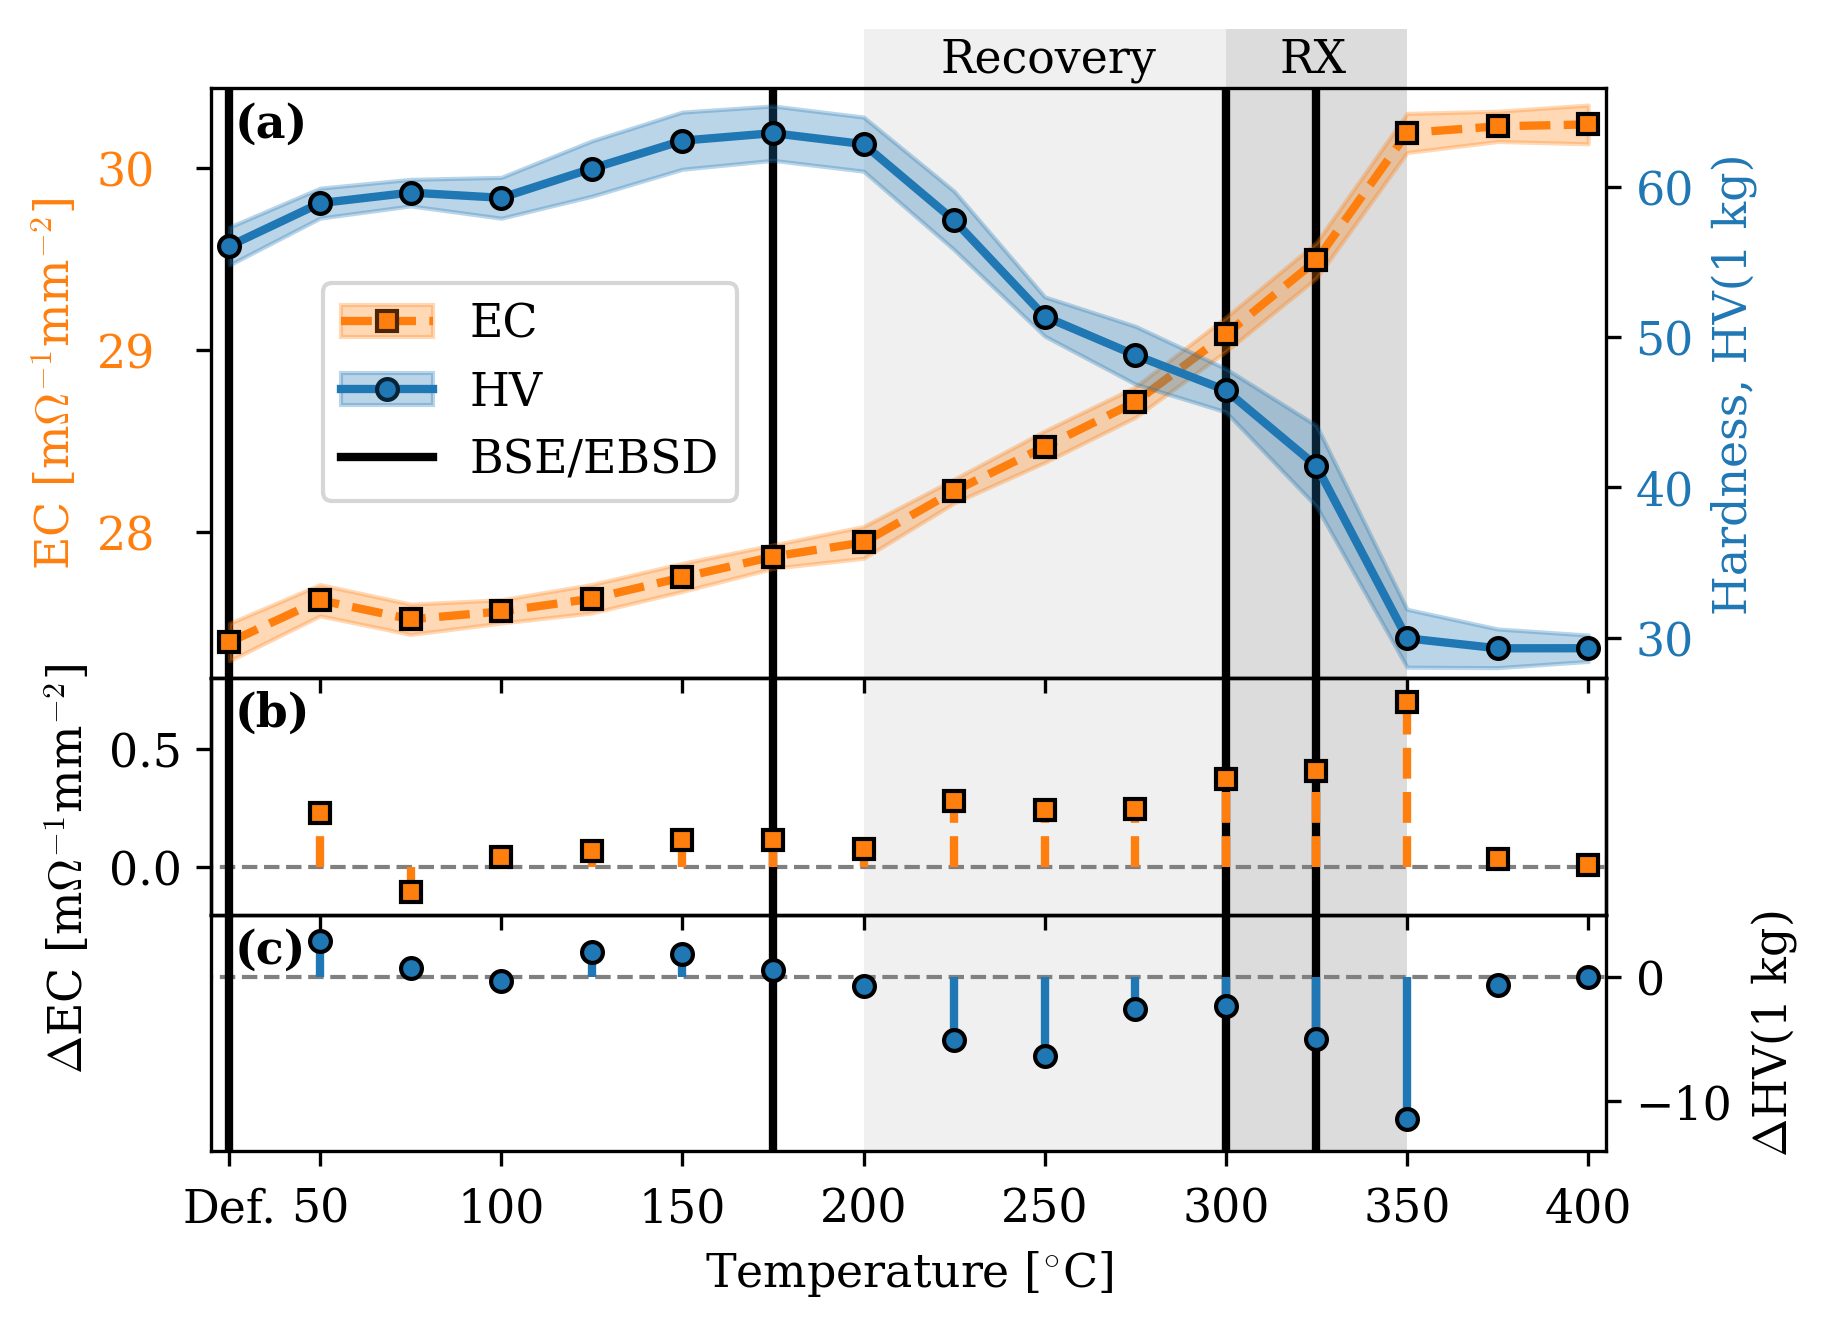

In [22]:
# EC/HV diff.
ec_diff = np.insert(np.diff(ec.ec).astype(float), 0, np.nan)
hv_diff = np.insert(np.diff(hv.hv).astype(float), 0, np.nan)

# Create figure with a grid
fig = plt.figure(figsize=(21, 4.6))  # (23, 5)
gs = fig.add_gridspec(3, 3, height_ratios=[2.5, 1, 1])
plot_kw = dict(clip_on=False, zorder=3, markeredgecolor="k", lw=2)

ax2 = fig.add_subplot(gs[2, 0])
ax0_ec = fig.add_subplot(gs[0, 0], sharex=ax2)
ax1 = fig.add_subplot(gs[1, 0], sharex=ax2)

# Tick properties
xtick_loc0 = np.array([0, 1, 3, 5, 7, 9, 11, 13, 15])
xtick_numbered_n = len(xtick_loc0) - 5
xtick_labels0 = [
    "Def.",
    "50", "100", "150", "200", "250", "300", "350", "400",
]

# Uncertainty
hv_std_upper = (hv.hv + 2*hv.hv_std).astype(float)
hv_std_lower = (hv.hv - 2*hv.hv_std).astype(float)
ec_std_upper = (ec.ec + 2*ec.ec_std).astype(float)
ec_std_lower = (ec.ec - 2*ec.ec_std).astype(float)

# (a) EC and HV
# -------------

# Plot EC
ec_color = "C1"
p1 = ax0_ec.plot(ec.index, ec.ec, "--s", color=ec_color, **plot_kw)
p2 = ax0_ec.fill_between(x=ec.index, y1=ec_std_upper, y2=ec_std_lower, color=ec_color, alpha=0.3)
ax0_ec.set_ylabel("EC [m$\Omega^{-1}$mm$^{-2}$]", color=ec_color)

# Plot HV
hv_color = "C0"
ax0_hv = ax0_ec.twinx()
p3 = ax0_hv.plot(hv.index, hv.hv, "-o", color=hv_color, **plot_kw)
p4 = ax0_hv.fill_between(x=hv.index, y1=hv_std_upper, y2=hv_std_lower, color=hv_color, alpha=0.3)
p5 = ax0_hv.plot(np.nan, "--o", color=hv_color)
ax0_hv.set_ylabel("Hardness, HV(1 kg)", color=hv_color)
ax0_hv.set_frame_on(False)

# (b) Plot EC difference
# ----------------------
markerline1, stemline1, _ = ax1.stem(ec.index, ec_diff, bottom=0, linefmt="--" + ec_color, markerfmt=ec_color + "s", basefmt="none")
markerline1.set_markeredgecolor("k")
stemline1.set_linewidth(2)
ax1.plot([-10, 20], [0, 0], "--", c="gray", zorder=0)
ax1.set_ylim(-0.2, 0.8)
ax1.set_ylabel("$\Delta$EC [m$\Omega^{-1}$mm$^{-2}$]", y=0.2)

# (c) Plot HV difference
# ----------------------
markerline2, stemline2, _ = ax2.stem(hv.index, hv_diff, bottom=0, linefmt="-" + hv_color, markerfmt=hv_color + "o", basefmt="none")
markerline2.set_markeredgecolor("k")
stemline2.set_linewidth(2)
ax2.plot([-10, 20], [0, 0], "--", c="gray", zorder=0)
ax2.set_ylim(-14, 5)
ax2.set_ylabel("$\Delta$HV(1 kg)")

# Axis limits
hv_min = hv.hv.min() - 2
hv_max = hv.hv.max() + 3
ec_min = ec.ec.min() - 0.2
ec_max = ec.ec.max() + 0.2
ax0_ec.set_ylim([ec_min, ec_max])
ec_y_values = [28, 29, 30]
ax0_ec.set_yticks(ec_y_values)
ax0_ec.set_yticklabels(ec_y_values)
ax0_hv.set_ylim([hv_min, hv_max])
ax2.set_xlim([hv.index.start - 0.2, hv.index.stop - 0.8])

# Tick parameters
ax0_ec.tick_params(axis="x", labelbottom=False)
ax1.tick_params(axis="x", labelbottom=False)
ax2.set_xticks(xtick_loc0)
ax2.set_xticklabels(xtick_labels0)
ax2.tick_params(axis="x", pad=5)
ax0_ec.tick_params(axis="y", labelcolor=ec_color, pad=10)
ax0_hv.tick_params(axis="y", labelcolor=hv_color)
# With no vertical spacing between subplots, ax0's x ticks aren't visible, so
# we add extra ticks to the top of ax1
ax11 = ax1.twiny()
ax11.set_xlim(ax1.get_xlim())
ax11.set_xticks(ax1.get_xticks())
ax11.set_xticklabels([])
ax11.xaxis.tick_top()
ax11.tick_params(axis="x", which="both", direction="in")
# Move HV difference y ticks to the right
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# Conditions studied by BSE/EBSD
for condition in [0, 6, 11, 12]:
    p5 = ax0_ec.axvline(condition, **bse_ebsd_kw)
    ax1.axvline(condition, **bse_ebsd_kw)
    ax2.axvline(condition, **bse_ebsd_kw)

# Subfigure labels
x_pos = 0.017
ax0_ec.text(x_pos, 0.9, "(a)", transform=ax0_ec.transAxes, **title_kw)
ax1.text(x_pos, 0.95, "(b)", transform=ax1.transAxes, ha="left", va="top", fontweight="bold")
ax2.text(x_pos, 0.95, "(c)", transform=ax2.transAxes, ha="left", va="top", fontweight="bold")

# EC/HV x axis labels
ax2.set_xlabel("Temperature [$^{\circ}$C]")
ax2.set_xticks(xtick_loc0)
ax2.set_xticklabels(xtick_labels0);

# Legend
ax0_ec.legend(
    [(p1[0], p2), (p3[0], p4), p5],
    ["EC", "HV", "BSE/EBSD"],
    loc=(0.08, 0.3),
)

# Highlight regions of recovery and recrystallization
ax0_ec.axvspan(xmin=7, xmax=11, ymax=1.1, fc=(240 / 255,) * 3, zorder=-5, clip_on=False)
ax0_ec.axvspan(xmin=11, xmax=13, ymax=1.1, fc=(220 / 255,) * 3, zorder=-5, clip_on=False)
ax1.axvspan(xmin=7, xmax=11, ymax=1.1, fc=(240 / 255,) * 3, zorder=-5)
ax1.axvspan(xmin=11, xmax=13, ymax=1.1, fc=(220 / 255,) * 3, zorder=-5)
ax2.axvspan(xmin=7, xmax=11, ymax=1.1, fc=(240 / 255,) * 3, zorder=-5)
ax2.axvspan(xmin=11, xmax=13, ymax=1.1, fc=(220 / 255,) * 3, zorder=-5)
ax0_ec.text(0.6, 1.01, "Recovery", transform=ax0_ec.transAxes, ha="center", va="bottom")
ax0_ec.text(0.79, 1.01, "RX", transform=ax0_ec.transAxes, ha="center", va="bottom")

# Save figure
fig.subplots_adjust(wspace=0.25, hspace=0)
fig.savefig(os.path.join(dir_article, "rx_kinetics/ec_hv.pdf"), **savefig_kw)

Macrotexture

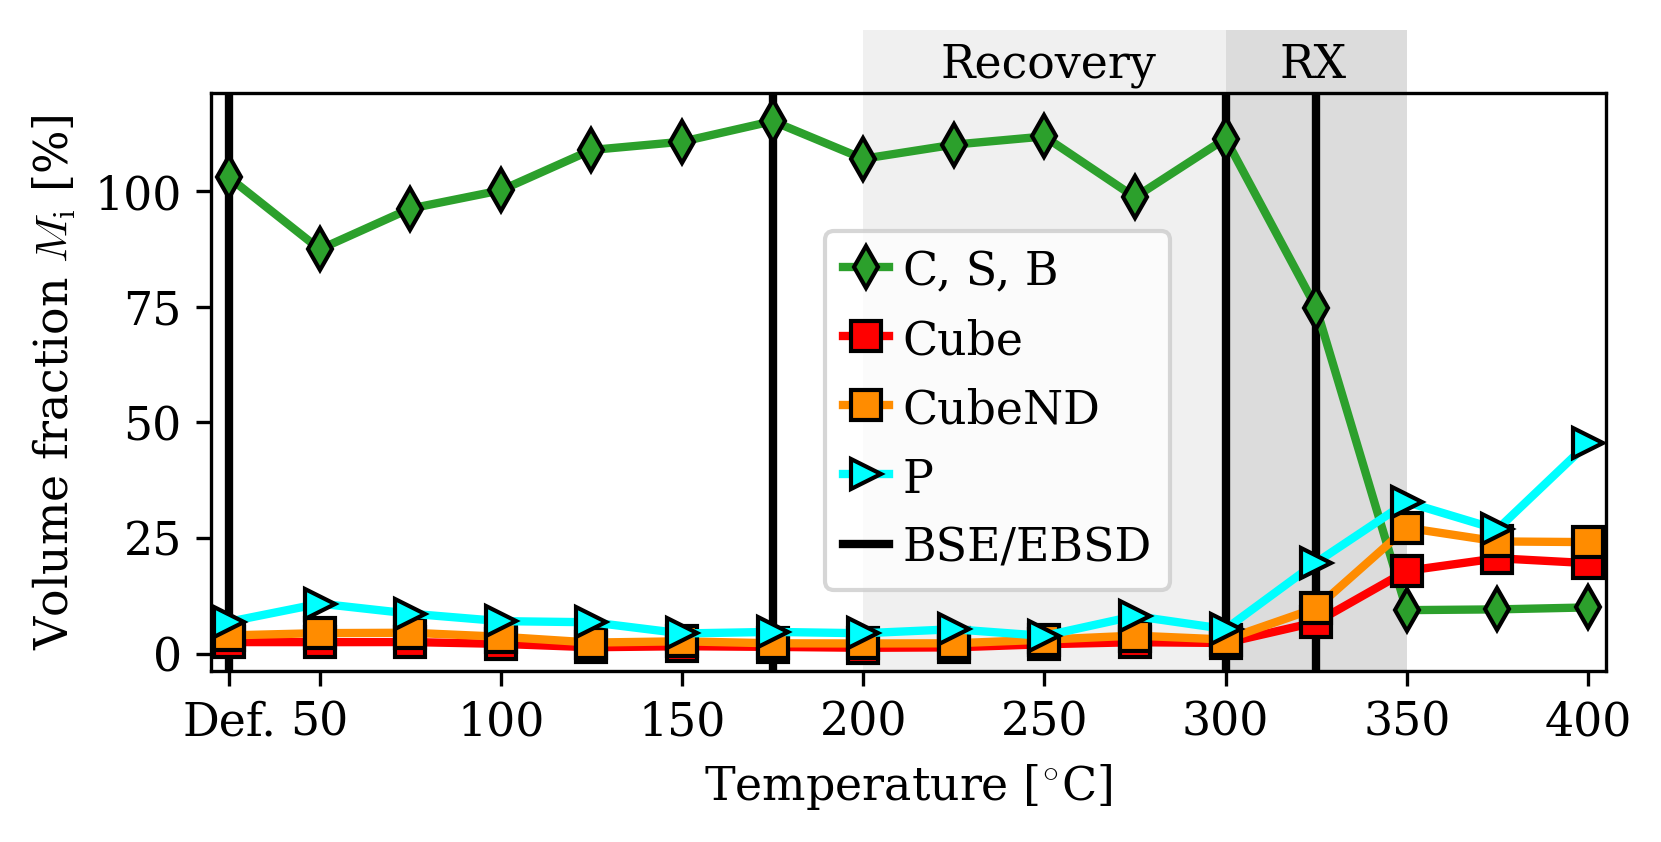

In [34]:
# Tick properties
xtick_loc1 = np.array([0, 1, 3, 5, 7, 9, 11, 13, 15])
xtick_numbered_n = len(xtick_loc1) - 2
xtick_labels1 = [
    "Def.",
    "50", "100", "150", "200", "250", "300", "350", "400",
]

# Texture component descriptions
names = ["C, S, B", "Cube", "CubeND", "P"]

fig, ax = plt.subplots(figsize=(6, 2.5))
for data, name in zip([texture.deform, texture.cube, texture.cubend, texture.p], names):
    ax.plot(
        texture.index,
        data,
        f"{comp_markers[name]}-",
        color=comp_colors[name],
        label=name,
        zorder=3,
        clip_on=False,
        lw=2,
        **marker_kw,
    )

# Y limits
m_values = [texture.p.values, texture.cube.values, texture.cubend.values, texture.deform.values]
y_lim = [np.nanmin(m_values) - 5, np.nanmax(m_values) + 6]
ax.set_ylim(y_lim)

ax.set_xlabel("Temperature [$^{\circ}$C]")
ax.set_ylabel("Volume fraction $M_{\mathrm{i}}$ [%]")

# Tick parameters
ax.set_xlim([texture.index.start - 0.2, texture.index.stop - 0.8])
ax.set_xticks(xtick_loc1)
ax.set_xticklabels(xtick_labels1)

# Conditions studied by BSE/EBSD
conditions = [0, 6, 11, 12]
for condition in conditions:
    if condition == conditions[-1]:
        label = "BSE/EBSD"
    else:
        label=None
    ax.axvline(condition, label=label, **bse_ebsd_kw)

# Legend
ax.legend(
    loc=(0.44, 0.14),
    handlelength=1,
    handleheight=1,
    handletextpad=0.3,
)

# Highlight regions of recovery and recrystallization
ax.axvspan(xmin=7, xmax=11, ymax=1.11, fc=(240 / 255,) * 3, zorder=-5, clip_on=False)
ax.axvspan(xmin=11, xmax=13, ymax=1.11, fc=(220 / 255,) * 3, zorder=-5, clip_on=False)
ax.text(0.6, 1.01, "Recovery", transform=ax.transAxes, ha="center", va="bottom")
ax.text(0.79, 1.01, "RX", transform=ax.transAxes, ha="center", va="bottom")

fig.savefig(os.path.join(dir_article, "macrotexture/volume_fractions.pdf"), **savefig_kw)

Print selected values

In [30]:
ec.iloc[[0, 6, 11, 12, 13, 14, 15]]

sample    t    T hold         ec    ec_std ec_temp   ec_diff
0   as deformed    0   25    0  27.392333   0.05144   23.62       NaN
6             7    3  175    0     27.862  0.032099   23.38     0.114
11           12  5.5  300    0  29.084667  0.046958  23.588  0.372667
12           13    6  325    0  29.492333  0.048897  23.588  0.407667
13           14  6.5  350    0  30.192333  0.053799   23.62       0.7
14           15    7  375    0  30.228667  0.041584   23.62  0.036333
15           16  7.5  400    0  30.239333  0.053171   23.62  0.010667

In [31]:
hv.iloc[[0, 6, 11, 12, 13, 14, 15]]

sample    t    T hold    hv1    hv2    hv3    hv4    hv5    hv6  \
0   as deformed    0   25    0  56.34  55.79  55.66  56.21   57.4   55.6   
6             7    3  175    0  62.56  62.77  62.23  63.91  63.31  64.26   
11           12  5.5  300    0  45.97  46.16  46.73  46.31  47.71  46.34   
12           13    6  325    0  42.85  42.59  40.48  40.84  42.38  39.21   
13           14  6.5  350    0  32.08  29.51   29.8  29.36  30.79  29.48   
14           15    7  375    0     30  29.49  28.35  28.52   28.9  30.45   
15           16  7.5  400    0     29   28.3  29.45  29.49  29.21  29.36   

      hv7    hv8    hv9   hv10      hv    hv_std dwell_time load    diff  
0   56.69  55.94  55.62  55.28  56.053  0.628385         15    1     NaN  
6   63.82  63.18  65.07  64.45  63.556  0.903822         15    1   0.498  
11  47.39  45.88  45.29  46.73  46.451  0.718385         15    1  -2.342  
12  42.35  41.94  39.38  42.17  41.419  1.345729         15    1  -5.032  
13   30.8  29.45  29.45   28.9  29.962  0.963279         15    1 -11.457  
14  29.57   29.2     29  29.46  29.294  0.642706         15    1  -0.668  
15  29.49  29.97  29.17  29.55  29.299  0.437758         15    1   0.005

In [32]:
texture.iloc[[0, 6, 12, 13, 14, 15]]

t    T hold textureindex entropy   odfmax        b        c        s  \
0     0   25    0       3.8236   -0.86  11.6922  30.0864  39.2585  33.6371   
6     3  175    0       4.5957 -0.9862   14.378  31.0213  45.8139  38.3377   
12    6  325    0       2.9794 -0.6771   8.5761  20.0603  28.5819  26.1821   
13  6.5  350    0       5.3084 -0.8392  21.1844   4.7829    1.096   3.5059   
14    7  375    0       5.4531 -0.7809  37.4044   2.8745   2.3435   4.3297   
15  7.5  400    0       5.7567 -0.9348    27.35   3.5719   1.9587   4.4414   

       cube   cubend        p    deform       tot spread  
0    2.4741   3.9233    6.878   102.982  116.2574     15  
6     1.433   2.2092   4.6794  115.1729  123.4945     15  
12   6.7788   9.8282  19.6836   74.8243  111.1149     15  
13  17.8914  27.1993  32.7455    9.3848    87.221     15  
14  20.6089   24.247  26.8568    9.5477   81.2604     15  
15  19.5509  24.1028  45.4928     9.972   99.1185     15

In [33]:
texture_huang_400c = {"p": 46.2, "cubend": 11.4, "cube": 6.9}
texture_here_400c = {"p": texture.iloc[15]["p"], "cubend": texture.iloc[15]["cubend"], "cube": texture.iloc[15]["cube"]}

print((
    "This work (Huang)\n"
    f"* p/cubend: {texture_here_400c['p'] / texture_here_400c['cubend']:.2f} ({texture_huang_400c['p'] / texture_huang_400c['cubend']:.2f})\n"
    f"* p/cube:   {texture_here_400c['p'] / texture_here_400c['cube']:.2f} ({texture_huang_400c['p'] / texture_huang_400c['cube']:.2f})"
))

This work (Huang)
* p/cubend: 1.89 (4.05)
* p/cube:   2.33 (6.70)


## Particle statistics

From all BSE images, not just the regions of interest (ROIs) in the corrected EBSD maps

In [67]:
regions_kw = dict(
    dx=step_size["bse"] * 1e-3,
    dy=step_size["bse"] * 1e-3,
    scan_unit="um",
    background_label=0
)

Read data generated in the notebook `bse2_particle_detection`, combining them into
one dataset per temperature, thus loosing spatial information

In [68]:
ecd_max = 0
particles = {}
total_area = np.zeros(4)

for i, sample in enumerate(identifier):
    particle_area = []
    for j in range(3):
        labels = np.load(os.path.join(
            dir_data, f"prover/{sample}/{j + 1}/partdet/bse_labels_filled_filtered.npy"
        ))

        regions = MapRegions(labels, **regions_kw)
        
        total_area[i] += np.prod(regions.map_shape) * regions.dx * regions.dy
        
        particle_area.append(regions.area)

    area = np.hstack(particle_area)
    particles_i = pd.DataFrame(data=area, columns=["area"])
    particles_i["radius"] = np.sqrt(particles_i.area / np.pi)
    particles_i["ecd"] = 0.816 * 2 * particles_i.radius
    
    ecd_max_i = particles_i.ecd.max()
    if ecd_max_i > ecd_max:
        ecd_max = ecd_max_i
    
    particles[sample] = particles_i

Cumulative distribution function of particle sizes and area weighted histogram
of particle sizes $d$

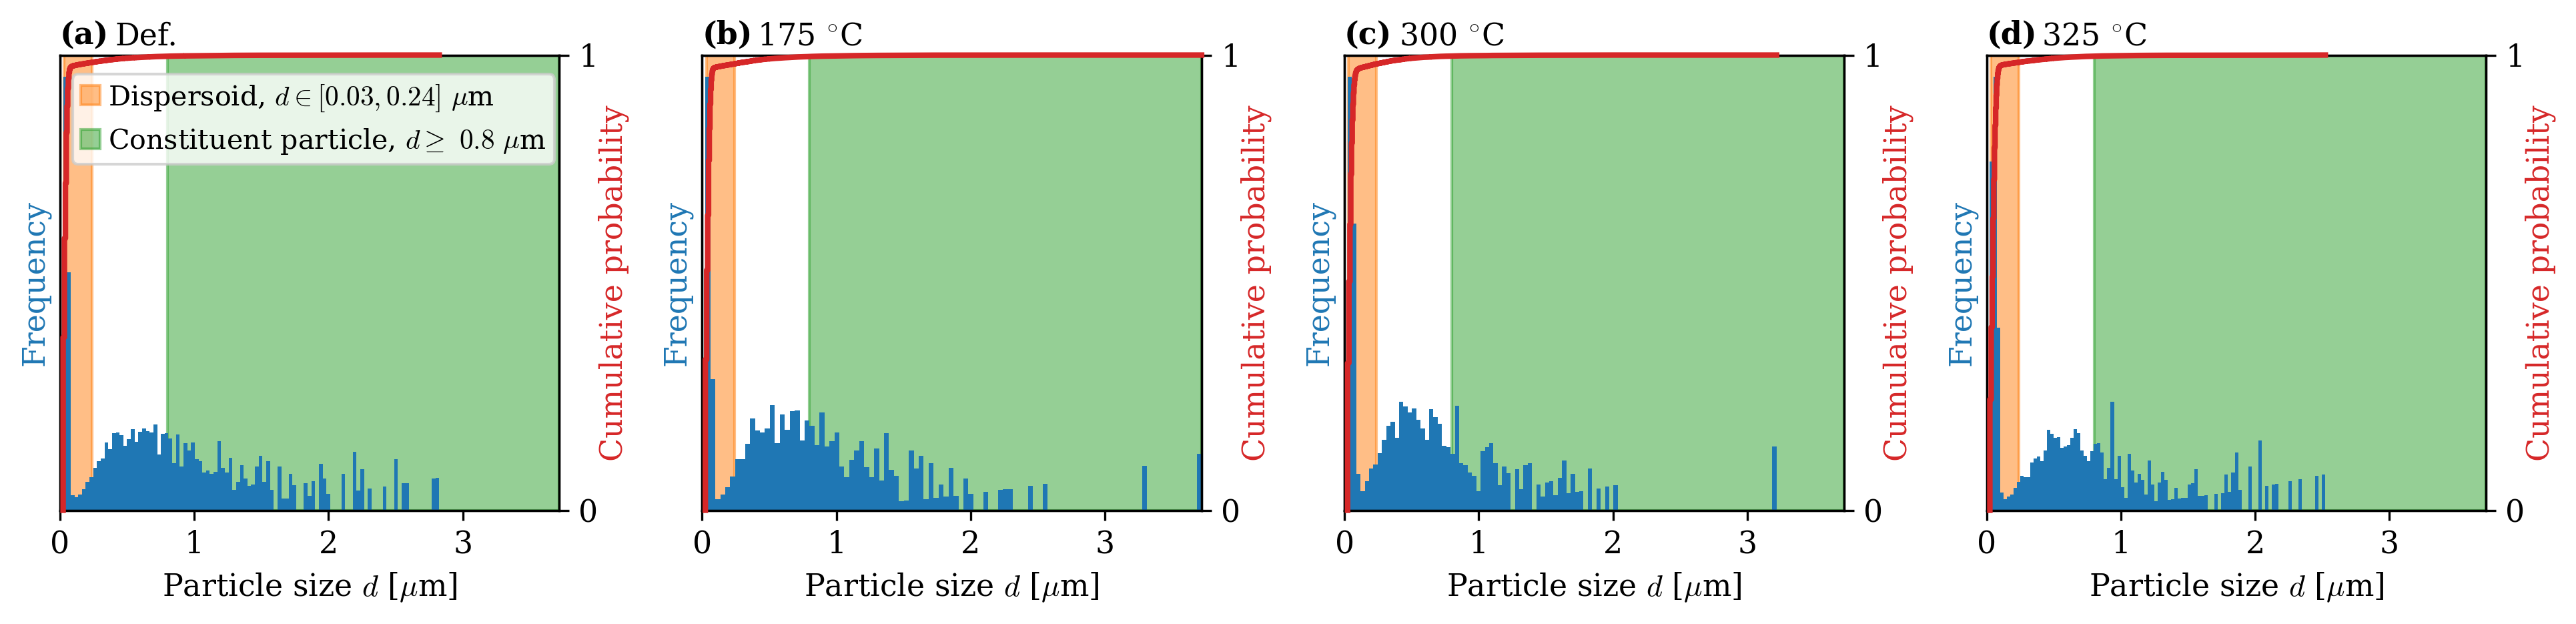

In [69]:
fig, ax = plt.subplots(ncols=4, figsize=(13, 3.25))
labels = ["a", "b", "c", "d"]

for i, sample in enumerate(particles.keys()):
    ecd = particles[sample].ecd
    ecd_sorted = np.sort(ecd)
    ecd_cdf = np.arange(particles[sample].shape[0]) / particles[sample].shape[0]
    
    par = ax[i].twinx()
    *_, p1 = ax[i].hist(ecd, bins=100, weights=particles[sample].area)
    p2, = par.plot(ecd_sorted, ecd_cdf, "C3", clip_on=False, zorder=3, linewidth=2)
    
    # Labels
    ax[i].set_xlabel(r"Particle size $d$ [$\mu$m]")
    ax[i].set_ylabel("Frequency", labelpad=0)
    ax[i].yaxis.get_label().set_color(p1[0].get_facecolor())
    par.set_ylabel("Cumulative probability", labelpad=0)
    par.yaxis.get_label().set_color(p2.get_color())
    
    # Axes ticks and limits
    ax[i].set_yticks([])
    ax[i].set_xlim(0, ecd_max)
    par.set_ylim(0, 1)
    par.set_yticks([0, 1])
    
    # Regions
    ax[i].axvspan(
        xmin=dispersoid_threshold_min,
        xmax=dispersoid_threshold_max,
        color="C1",
        alpha=0.5,
        zorder=0,
        label=r"Dispersoid, $d \in " + f"[{dispersoid_threshold_min:.2f}, {dispersoid_threshold_max:.2f}]" + r"$ $\mu$m",
    )
    ax[i].axvspan(
        xmin=constituent_threshold,
        xmax=ecd_max,
        color="C2",
        alpha=0.5,
        zorder=0,
        label=r"Constituent particle, $d \geq$ " + f"${constituent_threshold:.1}$" + r" $\mu$m",
    )
    
    # Title
    ax[i].text(0, 1.01, f"({labels[i]})", ha="left", va="bottom", transform=ax[i].transAxes, fontweight="bold")
    ax[i].text(0.11, 1.008, titles[i], ha="left", va="bottom", transform=ax[i].transAxes)

ax[0].legend(
    loc=(0.025, 0.76),
    handlelength=0.7,
    handletextpad=0.3,
    borderpad=0.3,
    fontsize=plt.rcParams["font.size"] - 1.1
)
fig.tight_layout()
fig.savefig(os.path.join(dir_article, "particle_stats/particle_size_hist.pdf"), **savefig_kw)

Other particle statistics:

Particle volume fraction $F_V$

$$
F_V = \frac{\sum_i^n A_i}{A_{\mathrm{total}}}.
$$

Number of particles per unit volume $N_V$

$$
N_V = \frac{3F_V}{4\pi r^3}.
$$

Number of particles crossing unit area $N_S$

$$
N_S = 2rN_v = \frac{3F_V}{2\pi r^2}.
$$

Distance to nearest neighboring particle assuming particles distributed in a grid $\lambda$

$$
\lambda = \frac{1}{\sqrt{N_S}},
$$

In [70]:
columns=[
    "total_area",
    "n", "n_c", "n_d",
    "fv", "fv_c", "fv_d",
    "ecd_mean", "ecd_var", "ecd_confint",
    "ecd_mean_c", "ecd_var_c", "ecd_confint_c",
    "ecd_mean_d", "ecd_var_d", "ecd_confint_d",
    "nv_mean", "nv_std",
    "nv_mean_c", "nv_std_c",
    "nv_mean_d", "nv_std_d",
    "ns_mean", "ns_std",
    "ns_mean_c", "ns_std_c",
    "ns_mean_d", "ns_std_d",
    "nn_distance_grid", "nn_distance_grid_c", "nn_distance_grid_d",
]
particle_stats = pd.DataFrame(
    np.zeros((len(identifier), len(columns))),
    index=identifier,
    columns=columns,
)
particle_stats["total_area"] = total_area

for sample in particles.keys():
    area_i = particles[sample].area
    ecd_i = particles[sample].ecd
    radius_i = particles[sample].radius
    
    # Boolean masks for all, constituent and dispersoid particles
    mask_all = np.ones(ecd_i.size, dtype=bool)
    mask_c = ecd_i >= constituent_threshold
    mask_d = (ecd_i >= dispersoid_threshold_min) & (ecd_i <= dispersoid_threshold_max)

    for mask, suffix in zip([mask_all, mask_c, mask_d], ["", "_c", "_d"]):
        area_mask = area_i[mask]
        ecd_mask = ecd_i[mask]
        radius_mask = radius_i[mask]

        # Number of particles
        # -------------------
        particle_stats.loc[sample]["n" + suffix] = len(area_mask)

        # Volume fraction
        # ---------------
        fv = area_mask.sum() / particle_stats.loc[sample]["total_area"]
        particle_stats.loc[sample]["fv" + suffix] = fv

        # Area weighted particle size
        # ---------------------------
        ecd_mean = np.average(ecd_mask, weights=area_mask)
        particle_stats.loc[sample]["ecd_mean" + suffix] = ecd_mean
        ecd_var = np.average((ecd_mask - ecd_mean) ** 2, weights=area_mask)
        particle_stats.loc[sample]["ecd_var" + suffix] = ecd_var
        particle_stats.loc[sample]["ecd_confint" + suffix] = 1.96 * np.sqrt(ecd_var) / np.sqrt(ecd_var.size)

        # Number of particles per unit volume
        # -----------------------------------
        nv = 3 * fv / (4 * np.pi * radius_mask ** 3)
        particle_stats.loc[sample]["nv_mean" + suffix] = nv.mean()
        particle_stats.loc[sample]["nv_std" + suffix] = nv.std()

        # Number of particles per unit area
        # ---------------------------------
        ns = 2 * radius_mask * nv
        particle_stats.loc[sample]["ns_mean" + suffix] = ns.mean()
        particle_stats.loc[sample]["ns_std" + suffix] = ns.std()

        # Particle distance (grid)
        # ------------------------
        particle_stats.loc[sample]["nn_distance_grid" + suffix] = 1 / np.sqrt(ns.mean())

print(particle_stats[["ecd_mean_c", "ns_mean_c", "nn_distance_grid_c"]])
print(particle_stats[["ecd_mean_d", "ns_mean_d", "nn_distance_grid_d"]])

      ecd_mean_c  ns_mean_c  nn_distance_grid_c
0s      1.492928   0.011390            9.369783
175c    1.487248   0.011474            9.335552
300c    1.363459   0.007252           11.742597
325c    1.424886   0.010192            9.905406
      ecd_mean_d  ns_mean_d  nn_distance_grid_d
0s      0.070047   2.701585            0.608402
175c    0.069885   2.421056            0.642684
300c    0.078322   2.529665            0.628736
325c    0.069982   3.203512            0.558710


Number of particles

In [71]:
particle_stats[["n", "n_c", "n_d"]]

n    n_c      n_d
0s    117585.0  305.0  71039.0
175c   85070.0  273.0  55265.0
300c   68308.0  153.0  44914.0
325c   78925.0  197.0  58463.0

Statistics for particles (all, constituent and dispersoids)

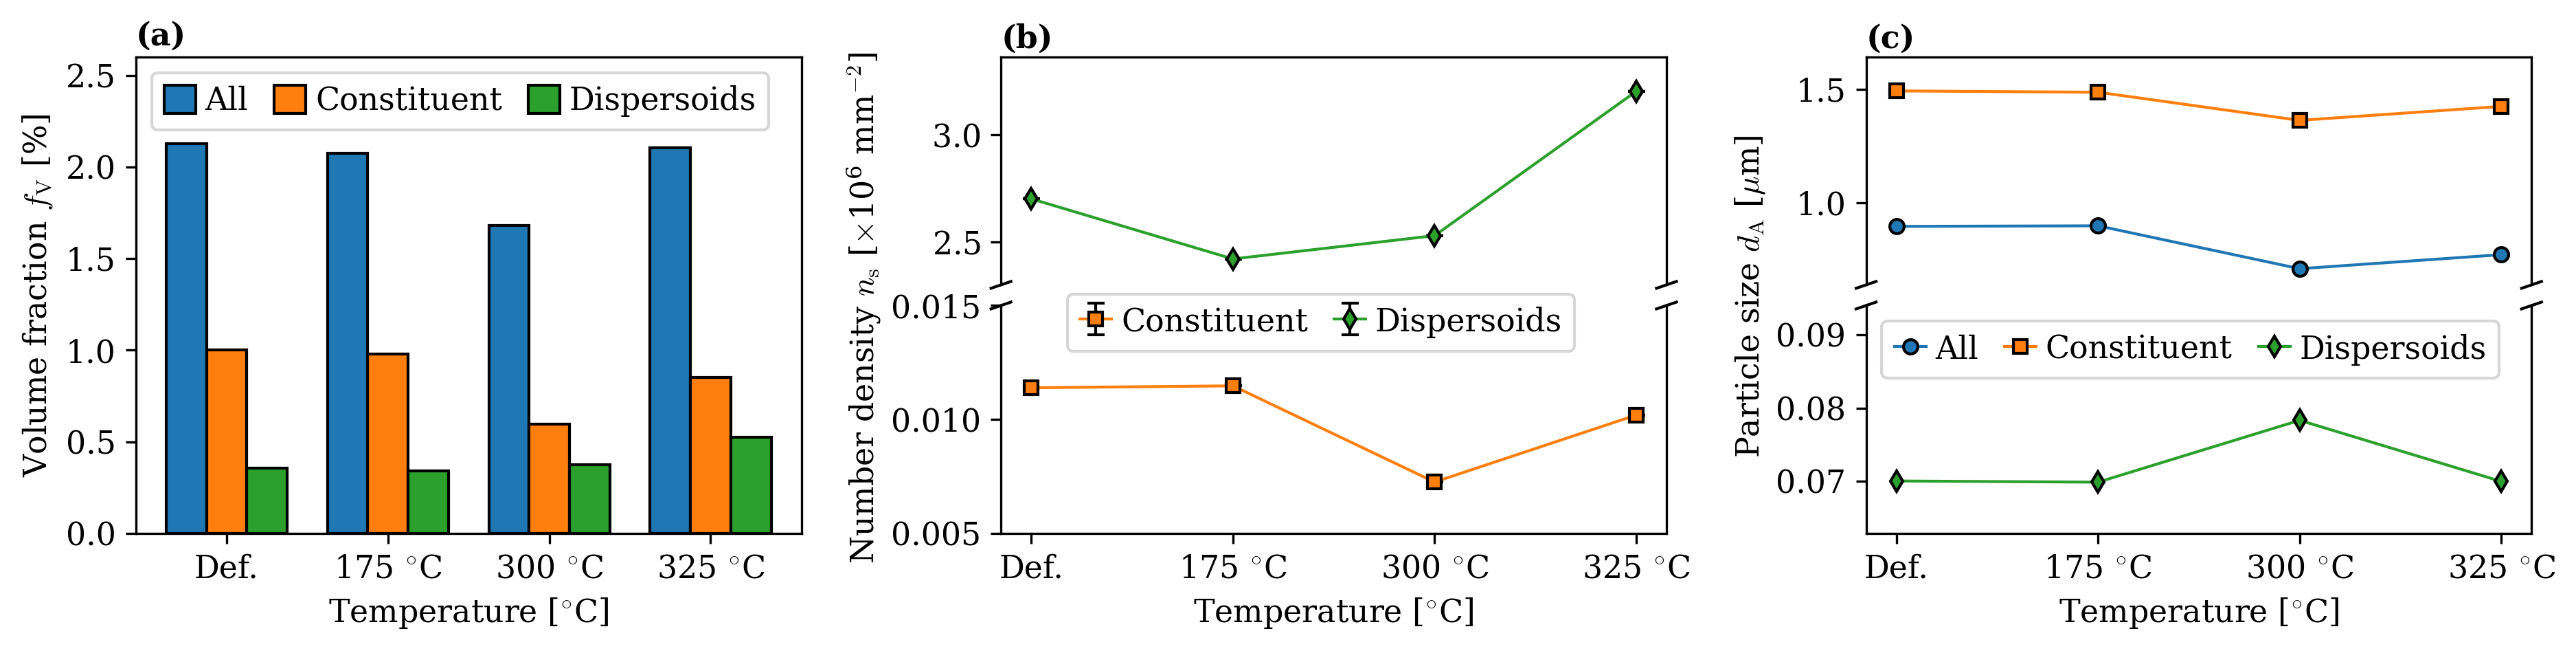

In [72]:
x = np.arange(len(particle_stats))
bar_width = 0.25
bar_kw = dict(width=bar_width, ec="k")

markers = ["o", "s", "d"]

# Set up figure
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 3))

# (a) Volume fraction
# -------------------
ax0.bar(x - bar_width, 100 * particle_stats.fv, label="All", **bar_kw)
ax0.bar(x, 100 * particle_stats.fv_c, label="Constituent", **bar_kw)
ax0.bar(x + bar_width, 100 * particle_stats.fv_d, label="Dispersoids", **bar_kw)
ax0.set_ylim(0, 2.6)
ax0.set_xticks(x)
ax0.set_xticklabels(titles)
ax0.set_xlabel("Temperature [$^{\circ}$C]")
ax0.set_ylabel("Volume fraction $f_{\mathrm{V}}$ [%]")
ax0.text(0, 1.01, "(a)", transform=ax0.transAxes, **title_kw)
ax0.legend(
    loc="upper left",
    ncol=3,
    handlelength=1,
    handleheight=1,
    handletextpad=0.3,
    columnspacing=0.83
)

# (b) Number density of particles N_s
# -----------------------------------
divider = make_axes_locatable(ax1)
ax12 = divider.new_vertical(size="100%", pad=0.1)
fig.add_axes(ax12)

for data, err, label, marker, c in zip(
    [particle_stats.ns_mean_c, particle_stats.ns_mean_d],
    [particle_stats.ns_std_c, particle_stats.ns_std_d],
    ["Constituent", "Dispersoids"],
    markers[1:],
    ["C1", "C2"],
):
    ax1.errorbar(x, data * 1e6, yerr=2 * err, label=label, color=c, marker=marker, **err_kw)
    ax12.errorbar(x, data * 1e6, yerr=2 * err, label=label, color=c, marker=marker, **err_kw)

ax12.tick_params(bottom=False, labelbottom=False)
ax1.spines["top"].set_visible(False)
ax12.spines["bottom"].set_visible(False)
ax1.set_ylim(particle_stats.ns_mean_c.min() * 1e6 * 0.95, particle_stats.ns_mean_c.max() * 1e6 * 1.15)
ax12.set_ylim(particle_stats.ns_mean_d.min() * 1e6 * 0.95, particle_stats.ns_mean_d.max() * 1e6 * 1.05)
d = 0.015
kwargs = dict(transform=ax12.transAxes, color='k', clip_on=False)
ax12.plot((-d, d), (-d, d), **kwargs)
ax12.plot((1 - d, 1 + d), (-d, d), **kwargs)
kwargs.update(transform=ax1.transAxes)
ax1.plot((-d, d), (1 - d, 1 + d), **kwargs)
ax12.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Axes and labels
ax1.set_xticks(x)
ax1.set_xticklabels(titles)
ytick_labels = ["0.005", "0.010", "0.015"]
ax1.set_yticks([float(i) * 1e6 for i in ytick_labels])
ax1.set_yticklabels(ytick_labels)
ax1.set_xlabel("Temperature [$^{\circ}$C]")
ax12.text(0, 1.01, "(b)", transform=ax12.transAxes, **title_kw)
# Get exponent of y axis (must draw before getting it)
ax12.ticklabel_format(useMathText=True)
plt.draw()
exp = ax12.get_yaxis().get_offset_text().get_text()
ax12.get_yaxis().get_offset_text().set_visible(False)
ax12.set_ylabel("Number density $n_{\mathrm{s}}$ [" + exp + r" mm$^{-2}$]", y=-0.1, labelpad=17)

# Legend
ax1.legend(
    loc=(0.1, 0.8),
    ncol=2,
    handlelength=1,
    handleheight=1,
    handletextpad=0.3,
    columnspacing=0.83,
)

# (c) Area weighted average particle size d_A
# -------------------------------------------
divider = make_axes_locatable(ax2)
ax22 = divider.new_vertical(size="100%", pad=0.1)
fig.add_axes(ax22)

for data, label, marker in zip(
    [particle_stats.ecd_mean, particle_stats.ecd_mean_c, particle_stats.ecd_mean_d],
    ["All", "Constituent", "Dispersoids"],
    markers,
):
    ax2.plot(x, data, label=label, marker=marker, markeredgecolor="k")
    ax22.plot(x, data, label=label, marker=marker, markeredgecolor="k")

ax2.set_xticks(x)
ax2.set_xticklabels(titles)

ax22.tick_params(bottom=False, labelbottom=False)
ax2.spines["top"].set_visible(False)
ax22.spines["bottom"].set_visible(False)
#ax2.set_ylim(0.06, 0.085)
#ax22.set_ylim(0.6, 1.6)
ax2.set_ylim(particle_stats.ecd_mean_d.min() * 0.9, particle_stats.ecd_mean_d.max() * 1.2)
ax22.set_ylim(particle_stats.ecd_mean.min() * 0.9, particle_stats.ecd_mean_c.max() * 1.1)
d = 0.015
kwargs = dict(transform=ax22.transAxes, color='k', clip_on=False)
ax22.plot((-d, d), (-d, d), **kwargs)
ax22.plot((1 - d, 1 + d), (-d, d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

ax2.set_xlabel("Temperature [$^{\circ}$C]")
ax22.set_ylabel("Particle size $d_{\mathrm{A}}$ [$\mathrm{\mu}$m]", y=-0.05, labelpad=10)
ax22.text(0, 1.01, "(c)", transform=ax22.transAxes, **title_kw)
ax2.legend(
    loc="upper left",
    ncol=3,
    handlelength=1,
    handleheight=1,
    handletextpad=0.3,
    columnspacing=0.83
)

fig.subplots_adjust(wspace=0.3)
fig.savefig(os.path.join(dir_article, "particle_stats/particle_stats.pdf"), **savefig_kw)

In [73]:
particle_stats["ns_mean"]

0s      28.234542
175c    25.224842
300c    19.862795
325c    21.196891
Name: ns_mean, dtype: float64

In [74]:
particle_stats["ns_mean_d"].iloc[2] / particle_stats["ns_mean_d"].iloc[0]

0.9363633618565442

### Estimated Mn in solid solution

Evaluation based on considerations made by Zhao et al. (2013) ([doi](https://doi.org/10.1080/14786435.2013.794315))

$$
\frac{1}{EC} = 0.0267 + 0.032\mathrm{Fe_{ss}}\% + 0.033\mathrm{Mn_{ss}}\% + 0.0068\mathrm{Si_{ss}}\% + 0.0021 f_{\mathrm{V}},
$$

where we neglect the contributions from Fe and Si in solid solution (see above referenced paper for details)

In [75]:
ec_vals = ec.iloc[[0, 6, 11, 12]].ec.values.astype(float)
fe_pct = 0
si_pct = 0.01
particle_pct = 100 * particle_stats.fv.values.astype(float)

mn_pct = (1 / 0.033) * ((1 / ec_vals) - 0.0267 - (0.032 * fe_pct) - (0.0068 * si_pct) - (0.0021 * particle_pct))

print(mn_pct)

[0.15964523 0.14438955 0.12373894 0.08235206]


## Subgrain statistics

Read data generated with `MTEX`, combining them into one dataset per temperature, thus loosing spatial information

In [36]:
grains = {}
n_grains = {}
dist_to_gb_sorted = {}
dist_to_gb_cdf = {}

for sample in identifier:
    n_grains_sample = 0
    n_grains[sample] = np.zeros(3, dtype=int)
    for j in range(3):
        # Read data from file
        grains_j = pd.read_csv(
            os.path.join(dir_data, f"prover/{sample}/{j + 1}/mtex/grains.txt"),
            delimiter=","
        )
        
        # Add grains to existing frame, or create if first iteration
        if j == 0:
            grains_i = grains_j
        else:
            # Make sure to give each grain a unique ID across all datasets by
            # incrementing the ID
            grains_j["#id"] += n_grains_sample

            grains_i = pd.concat((grains_i, grains_j))

        # Increment grain number
        n_grains_sample += grains_j.shape[0]

        # Store number of grains per dataset
        n_grains[sample][j] = grains_j.shape[0]

    # Relevant statistics
    grains_i["area"] = grains_i["size"] * 0.1 ** 2
    grains_i["radius"] = np.sqrt(grains_i.area / np.pi)
    grains_i["ecd"] = 0.816 * 2 * grains_i.radius
    grains_i["is_al"] = grains_i.phase == 1
    # Thresholds found by trial and error on the partially recrystallized sample
    # at 325 C
    grains_i["is_rx"] = (
        grains_i.is_al
        & (grains_i.ecd > 4)  # 3 is too low
        & (grains_i.gos < np.deg2rad(1))  # 0.5 is too low, 2 is too high
        & (grains_i.xhab > 0.5)  # 0.75 is too high
    )

    # Change some data types
    grains_i["at_particle"] = grains_i["at_particle"].astype(bool)
    grains_i["at_constituent_particle"] = grains_i["at_constituent_particle"].astype(bool)

    grains[sample] = grains_i
    
    # Distance to grain boundary for dispersoids
    dist_to_gb_i = grains_i[
        ~grains_i.is_al
        & (grains_i.ecd >= dispersoid_threshold_min)
        & (grains_i.ecd <= dispersoid_threshold_max)
        & (grains_i.dist_to_gb != -1)
    ].dist_to_gb
    dist_to_gb_sorted[sample] = np.sort(dist_to_gb_i)
    dist_to_gb_cdf[sample] = np.arange(dist_to_gb_i.size) / dist_to_gb_i.size

Total (actual) area analyzed by EBSD

In [37]:
for sample in identifier:
    print(grains[sample].area.sum() / 1e6)

0.028080630000000006
0.0212023
0.02044781
0.02051379


Various statistics per temperature per texture component

In [38]:
# Data frame columns
columns = ["total_area_all", "total_area"]
other_columns = [
    "fv",
    "n_grains",
    "n_grains_per_area",
    "ecd_mean", "ecd_var", "ecd_confint",
    "gos_mean", "gos_var", "gos_confint",
    "gam_mean", "gam_var", "gam_confint",
]
for col in other_columns:
    for comp_name in comp_names_low[:-1] + ["all", "def"]:
        columns.append(col + "_" + comp_name)
# Empty data frame
grain_stats = pd.DataFrame(
    np.zeros((len(identifier), len(columns))),
    index=identifier,
    columns=columns,
)

for sample in identifier:
    # Grains at this temperature
    grains_i = grains[sample]

    # Grain stats (unfilled) at this temperature
    grain_stats_i = grain_stats.loc[sample]

    # Total area of all grains and particles at this temperature (in microns squared)
    grain_stats_i["total_area_all"] = grains_i.area.sum()

    # Consider only grains (not particles)
    grains_i = grains_i[grains_i.phase == 1]

    # Consider only subgrains
    grains_i = grains_i[~grains_i.is_rx]

    # Total area of subgrains at this temperature (in microns squared)
    grain_stats_i["total_area"] = grains_i.area.sum()

    # Component spresent, and how many there are of them, at this temperature
    ideal_unique_j, n_grains_j = np.unique(grains_i.ideal, return_counts=True)

    for comp_id, name in zip(
        np.append(ideal_unique_j, [-1, -1]), comp_names_low[:-1] + ["all", "def"]
    ):
        if name == "all":
            comp_id = ideal_unique_j
        elif name == "def":
            comp_id = ideal_id_def
            
        # Grains of this component
        grains_j = grains_i[np.isin(grains_i.ideal, comp_id)]
        n_grains_j = len(grains_j)
        
        # Volume fraction of component
        # ----------------------------
        area_j = grains_j.area
        grain_stats_i["fv_" + name] = area_j.sum() / grain_stats_i.total_area_all

        # Number of grains per area
        # -------------------------
        grain_stats_i["n_grains_" + name] = n_grains_j
        grain_stats_i["n_grains_per_area_" + name] = n_grains_j / grain_stats_i.total_area_all

        # ECD
        # ---
        ecd_mean_j = np.average(grains_j.ecd, weights=area_j)
        ecd_var_j = np.average((grains_j.ecd - ecd_mean_j) ** 2, weights=area_j)
        grain_stats_i["ecd_mean_" + name] = ecd_mean_j
        grain_stats_i["ecd_var_" + name] = ecd_var_j
        grain_stats_i["ecd_confint_" + name] = 1.96 * np.sqrt(ecd_var_j) / np.sqrt(n_grains_j)

        # GOS
        # ---
        gos_mean_j = np.average(grains_j.gos, weights=area_j)
        gos_var_j = np.average((grains_j.gos - gos_mean_j) ** 2, weights=area_j)
        grain_stats_i["gos_mean_" + name] = gos_mean_j
        grain_stats_i["gos_var_" + name] = gos_var_j
        grain_stats_i["gos_confint_" + name] = 1.96 * np.sqrt(gos_var_j) / np.sqrt(n_grains_j)

        # GAM
        # ---
        gam_mean_j = np.average(grains_j.gam, weights=area_j)
        gam_var_j = np.average((grains_j.gam - gam_mean_j) ** 2, weights=area_j)
        grain_stats_i["gam_mean_" + name] = gam_mean_j
        grain_stats_i["gam_var_" + name] = gam_var_j
        grain_stats_i["gam_confint_" + name] = 1.96 * np.sqrt(gam_var_j) / np.sqrt(n_grains_j)

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]


Total area of grains

In [34]:
grain_stats["total_area_all"] / 1e6

0s      0.028081
175c    0.021202
300c    0.020448
325c    0.020514
Name: total_area_all, dtype: float64

Total area of subgrains (excluding particles, recrystallized grains and too small subgrains)

In [33]:
grain_stats["total_area"] / 1e6

0s      0.026426
175c    0.020210
300c    0.019582
325c    0.011195
Name: total_area, dtype: float64

Total number of subgrains

In [35]:
grain_stats.n_grains_all

0s      60207.0
175c    53872.0
300c    23180.0
325c    10907.0
Name: n_grains_all, dtype: float64

Figure of volume fraction, number of grains and grain size per component per temperature

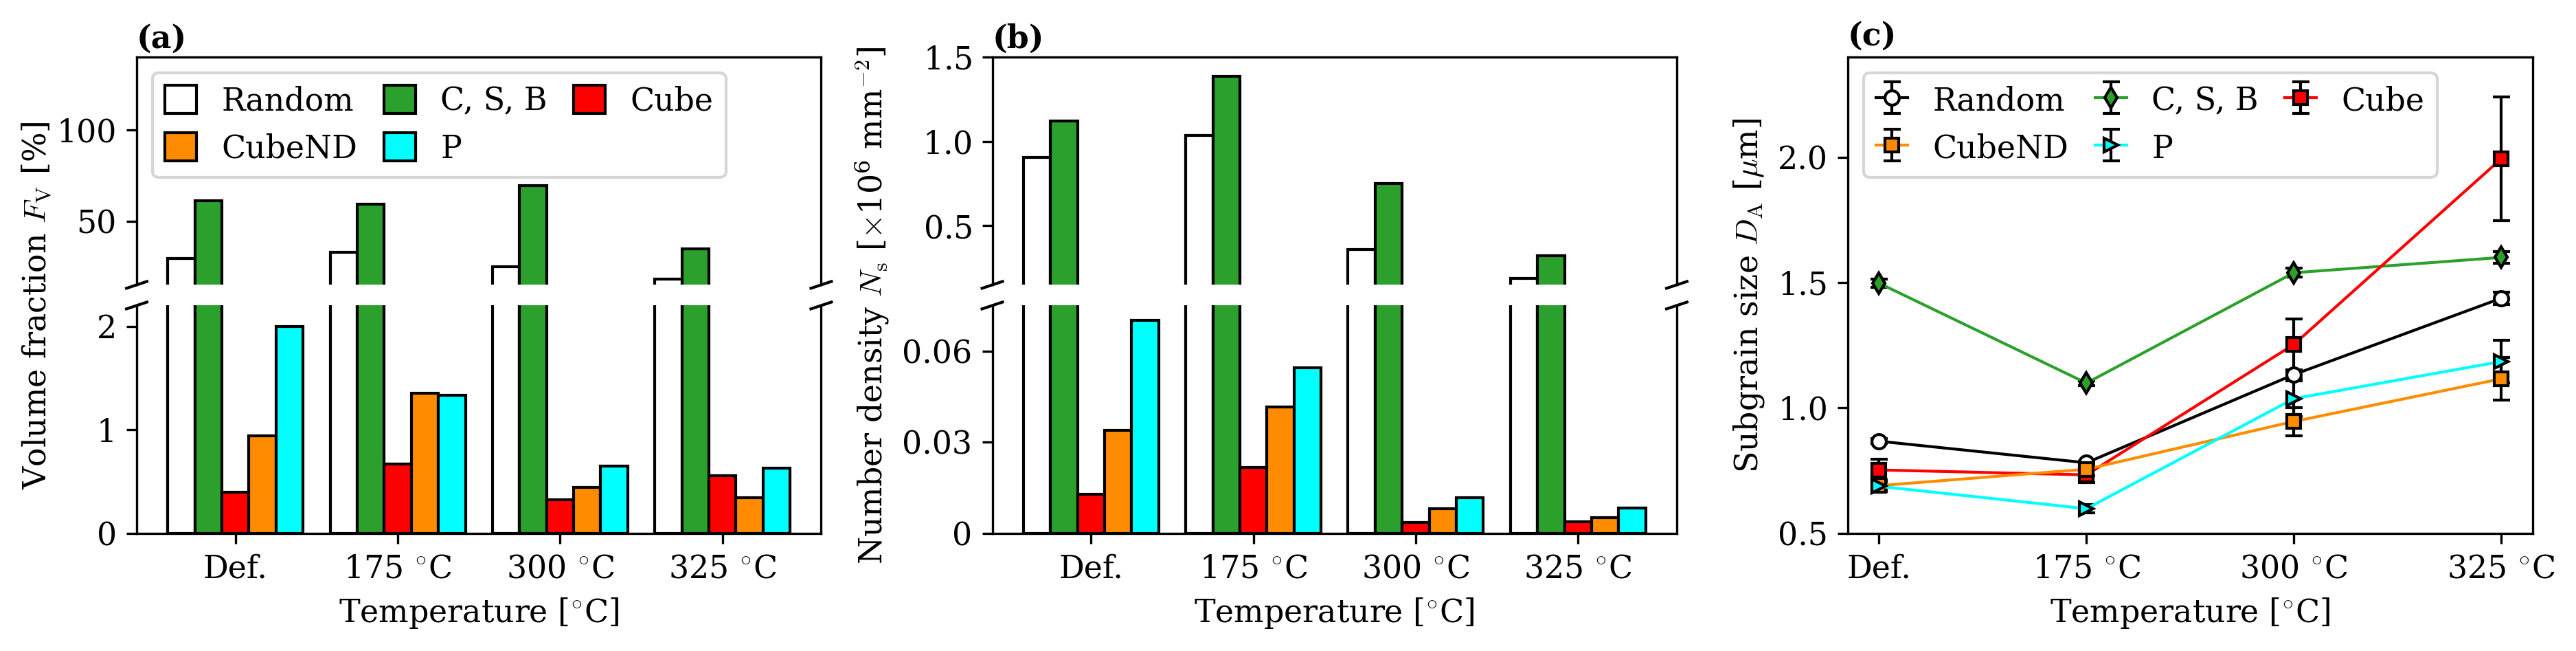

In [42]:
x = np.arange(len(grain_stats))
bar_width = 1 / 6
bar_kw = dict(width=bar_width, ec="k")

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 3))

# (a) Volume fraction
# -------------------
divider = make_axes_locatable(ax0)
ax01 = divider.new_vertical(size="100%", pad=0.1)
fig.add_axes(ax01)
handles = []
for w, name, label in zip(
    [-2 * bar_width, -bar_width, 0, bar_width, 2 * bar_width],
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7]
):
    c = comp_colors[label]
    h_i = ax0.bar(x + w, 100 * grain_stats[f"fv_{name.lower()}"], label=label, color=c, **bar_kw)
    ax01.bar(x + w, 100 * grain_stats[f"fv_{name.lower()}"], label=label, color=c, **bar_kw)
    handles.append(h_i)
# Broken axis
ax01.tick_params(bottom=False, labelbottom=False)
ax0.spines["top"].set_visible(False)
ax01.spines["bottom"].set_visible(False)
ax0.set_ylim(0, 2.2)
ax01.set_ylim(15, 140)
d = 0.015
kwargs = dict(transform=ax01.transAxes, color='k', clip_on=False)
ax01.plot((-d, d), (-d, d), **kwargs)
ax01.plot((1 - d, 1 + d), (-d, d), **kwargs)
kwargs.update(transform=ax0.transAxes)
ax0.plot((-d, d), (1 - d, 1 + d), **kwargs)
ax0.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
# Labels
ax0.set_xticks(x)
ax0.set_xticklabels(titles)
ax0.set_xlabel("Temperature [$^{\circ}$C]")
ax0.set_ylabel("Volume fraction $F_{\mathrm{V}}$ [%]", y=1, labelpad=15)
ax01.text(0, 1.01, "(a)", transform=ax01.transAxes, **title_kw)
ax01.legend(
    handles=[handles[0], handles[3], handles[1], handles[4], handles[2]],
    labels=[comp_names[0], comp_names[5], comp_names[-1], comp_names[6], comp_names[4]],
    loc="upper left",
    ncol=3,
    handlelength=1,
    handleheight=1,
    columnspacing=0.83,
)

# (b) Number density of subgrains
# -------------------------------
divider = make_axes_locatable(ax1)
ax11 = divider.new_vertical(size="100%", pad=0.1)
fig.add_axes(ax11)
for w, name, label in zip(
    [-2 * bar_width, -bar_width, 0, bar_width, 2 * bar_width],
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
):
    c = comp_colors[label]
    ax1.bar(x + w, grain_stats[f"n_grains_per_area_{name.lower()}"] * 1e6, label=label, color=c, **bar_kw)
    ax11.bar(x + w, grain_stats[f"n_grains_per_area_{name.lower()}"] * 1e6, label=label, color=c, **bar_kw)
# Broken axis
ax11.tick_params(bottom=False, labelbottom=False)
ax1.spines["top"].set_visible(False)
ax11.spines["bottom"].set_visible(False)
ax1.set_ylim(0, 0.075e6)
ax11.set_ylim(0.15e6, 1.5e6)
d = 0.015
kwargs = dict(transform=ax11.transAxes, color='k', clip_on=False)
ax11.plot((-d, d), (-d, d), **kwargs)
ax11.plot((1 - d, 1 + d), (-d, d), **kwargs)
kwargs.update(transform=ax1.transAxes)
ax1.plot((-d, d), (1 - d, 1 + d), **kwargs)
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
# Labels
ax1.set_xticks(x)
ax1.set_xticklabels(titles)
ytick_labels = ["0", "0.03", "0.06"]
ax1.set_yticks([float(i) * 1e6 for i in ytick_labels])
ax1.set_yticklabels(ytick_labels)
ax1.set_xlabel("Temperature [$^{\circ}$C]")
ax11.text(0, 1.01, "(b)", transform=ax11.transAxes, **title_kw)
# Get exponent of y axis (must draw before getting it)
ax11.ticklabel_format(useMathText=True)
plt.draw()
exp = ax11.get_yaxis().get_offset_text().get_text()
ax11.get_yaxis().get_offset_text().set_visible(False)
ax1.set_ylabel("Number density $N_{\mathrm{s}}$ [" + exp + r" mm$^{-2}$]", y=1)

# (c) Subgrain size (area weighted)
# ---------------------------------
handles3 = []
for w, name, label in zip(
    [-2 * bar_width, -bar_width, 0, bar_width, 2 * bar_width],
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
):
    line_color = comp_colors[label]
    if name == "Random":
        line_color = "k"
    h_i = ax2.errorbar(
        x,
        grain_stats[f"ecd_mean_{name.lower()}"],
        yerr=grain_stats[f"ecd_confint_{name.lower()}"],
        label=label,
        marker=comp_markers[label],
        color=line_color,
        markerfacecolor=comp_colors[label],
        **err_kw,
    )
    handles3.append(h_i)
ax2.set_xticks(x)
ax2.set_xticklabels(titles)
ax2.set_ylim(ymax=2.4)
ax2.set_xlabel("Temperature [$^{\circ}$C]")
ax2.set_ylabel(r"Subgrain size $D_{\mathrm{A}}$ [$\mu$m]")
ax2.text(0, 1.01, "(c)", transform=ax2.transAxes, **title_kw)
ax2.legend(
    handles=[handles3[0], handles3[3], handles3[1], handles3[4], handles3[2]],
    labels=[comp_names[0], comp_names[5], comp_names[-1], comp_names[6], comp_names[4]],
    loc="upper left",
    ncol=3,
    handlelength=1,
    handleheight=1,
    columnspacing=0.83,
)

fig.subplots_adjust(wspace=0.25)
fig.savefig(os.path.join(dir_article, "grain_stats/subgrain_stats.pdf"), **savefig_kw)

Volume fraction fractions

In [43]:
grain_stats["fv_p"] / grain_stats["fv_cubend"]

0s      2.125024
175c    0.984053
300c    1.471045
325c    1.817797
dtype: float64

In [44]:
grain_stats["fv_p"] / grain_stats["fv_cube"]

0s      5.019341
175c    1.996116
300c    1.986815
325c    1.124487
dtype: float64

Number of subgrains per area fractions

In [45]:
grain_stats["n_grains_per_area_p"] / grain_stats["n_grains_per_area_cubend"]

0s      2.067086
175c    1.310306
300c    1.469512
325c    1.574074
dtype: float64

In [46]:
grain_stats["n_grains_per_area_p"] / grain_stats["n_grains_per_area_cube"]

0s      5.477778
175c    2.526201
300c    3.301370
325c    2.207792
dtype: float64

Subgrain orientation spread (GOS) and subgrain average kernel average misorientation (GAM)

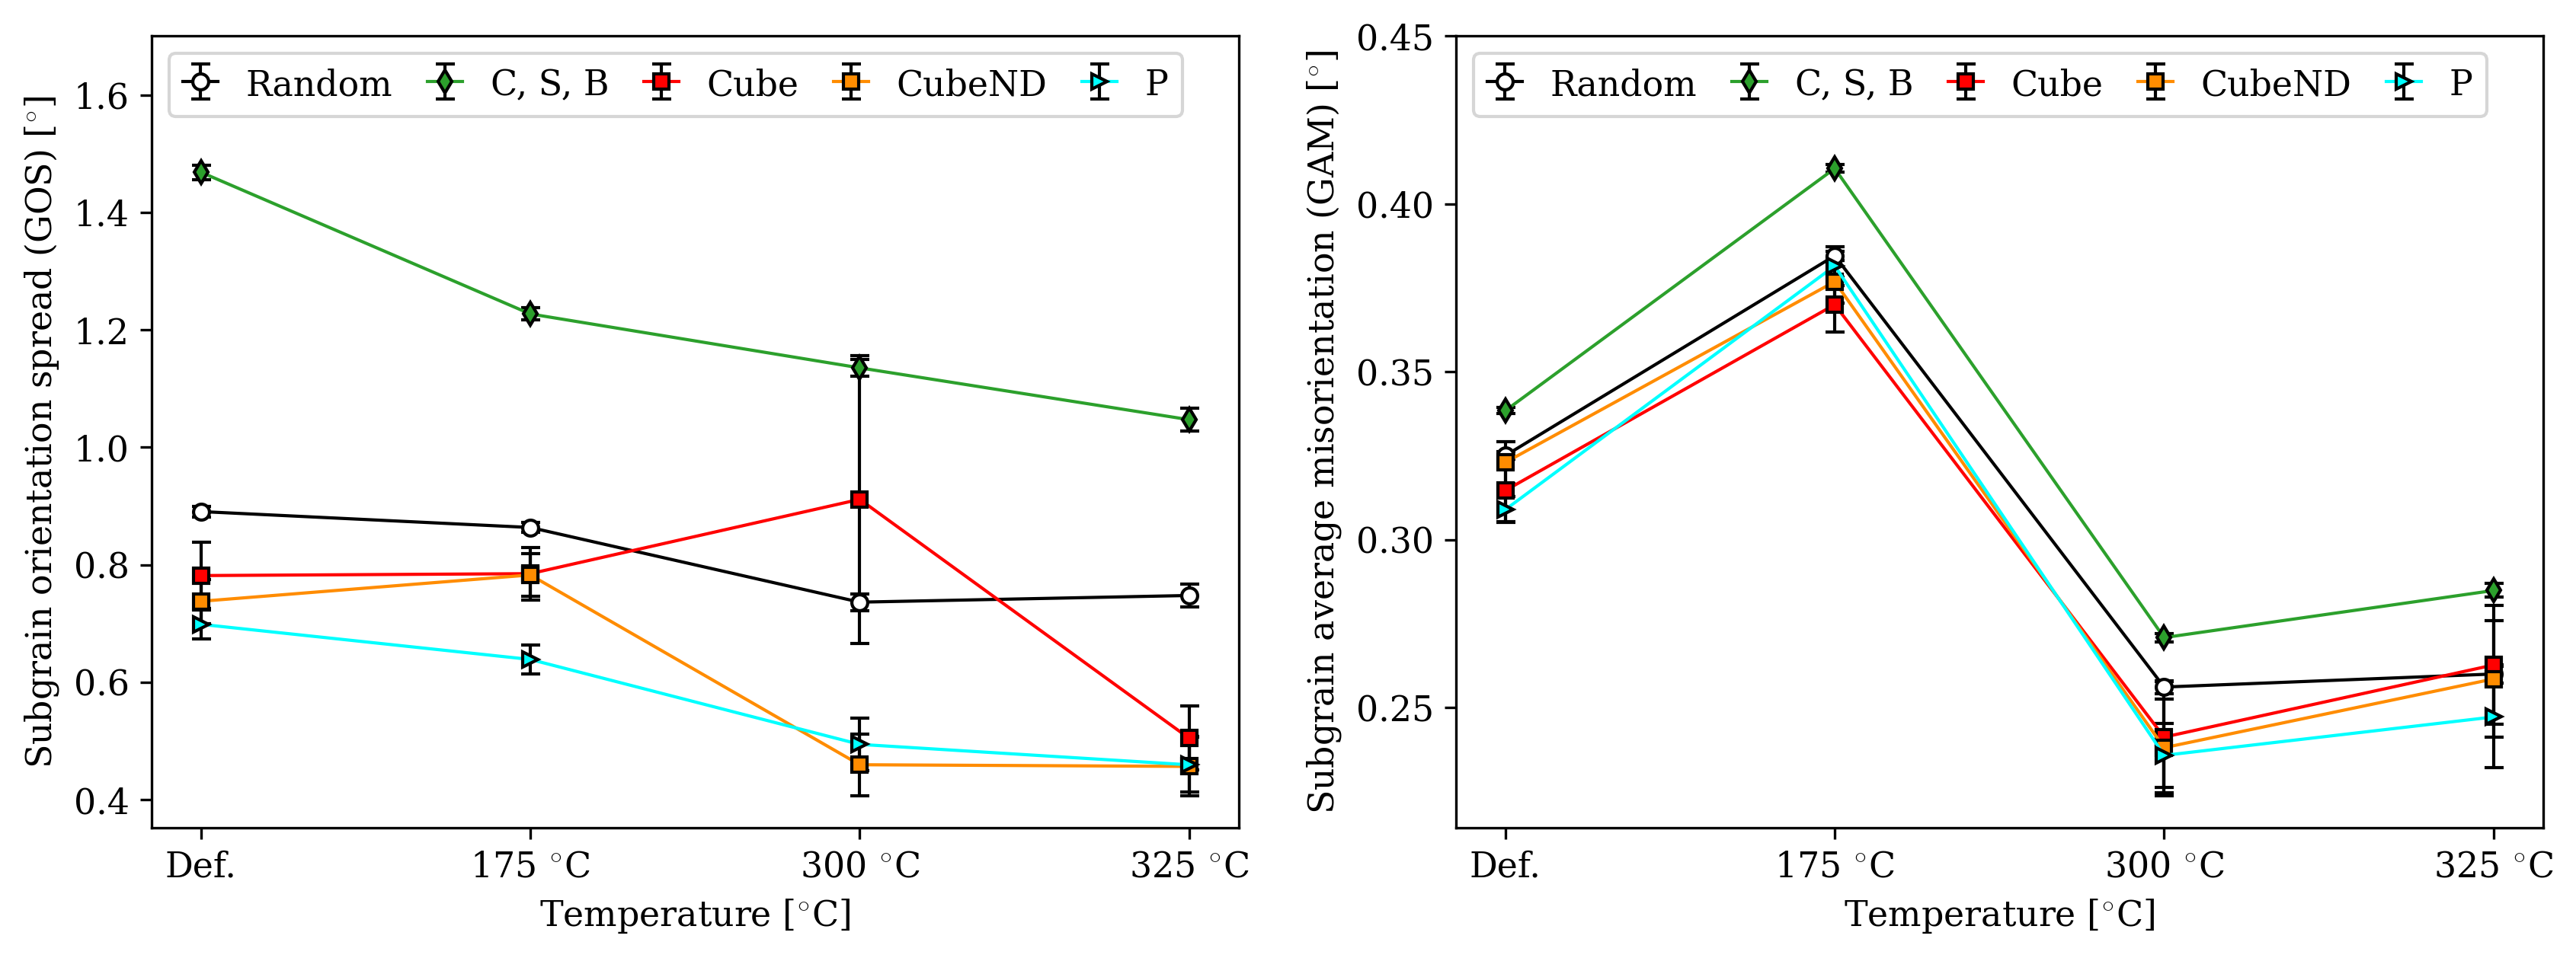

In [47]:
x = np.arange(len(grain_stats))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(13.5, 4.5))

# (a) GOS
# -------
for name, label in zip(
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7]
):
    if name == "Random":
        line_color = "k"
    else:
        line_color = comp_colors[label]
    ax0.errorbar(
        x,
        np.rad2deg(grain_stats[f"gos_mean_{name.lower()}"]),
        yerr=np.rad2deg(grain_stats[f"gos_confint_{name.lower()}"]),
        label=label,
        color=line_color,
        marker=comp_markers[label],
        markerfacecolor=comp_colors[label],
        **err_kw,
    )
ax0.set_xticks(x)
ax0.set_xticklabels(titles)
ax0.set_ylim(ymax=1.7)
ax0.set_xlabel("Temperature [$^{\circ}$C]")
ax0.set_ylabel("Subgrain orientation spread (GOS) [$^{\circ}$]")
ax0.legend()
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(
    ncol=5,
    loc="upper left",
    columnspacing=1,
    handleheight=1,
    handlelength=1,
)

# (b) GAM
# -------
for name, label in zip(
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
):
    if name == "Random":
        line_color = "k"
    else:
        line_color = comp_colors[label]
    ax1.errorbar(
        x,
        np.rad2deg(grain_stats[f"gam_mean_{name.lower()}"]),
        yerr=np.rad2deg(grain_stats[f"gam_confint_{name.lower()}"]),
        label=label,
        color=line_color,
        marker=comp_markers[label],
        markerfacecolor=comp_colors[label],
        **err_kw,
    )
ax1.set_xticks(x)
ax1.set_xticklabels(titles)
ax1.set_ylim(ymax=0.45)
ax1.set_xlabel("Temperature [$^{\circ}$C]")
ax1.set_ylabel("Subgrain average misorientation (GAM) [$^{\circ}$]")
ax1.legend()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    ncol=5,
    loc="upper left",
    columnspacing=1,
    handleheight=1,
    handlelength=1,
)

fig.subplots_adjust(wspace=0.2)

## Dispersoids at grain boundaries

Read data generated with `MTEX`, combining them into one dataset per temperature, thus loosing spatial information

In [49]:
gbs = {}

# --- Dispersoid statistics per texture component
# Data frame columns
other_columns = [
    "disp_per_length_mean", "disp_per_length_var", "disp_per_length_confint",
    "disp_size_mean", "disp_size_var", "disp_size_confint",
    "disp_size_per_length_mean", "disp_size_per_length_var", "disp_size_per_length_confint",
    "frac_csl3",
    "frac_csl7",
    "frac_csl7_at_constituent",
    "mori_mean", "mori_var", "mori_confint",
]
columns = []
for col in other_columns:
    for comp_name in comp_names_low[:-1] + ["all", "def", "csl3", "csl7"]:
        columns.append(col + "_" + comp_name)
comp_gb_stats = pd.DataFrame(
    np.zeros((len(identifier), len(columns))),
    index=identifier,
    columns=columns,
)

for sample in identifier:
    for j in range(3):
        # Read data from file
        gb_j = pd.read_csv(
            os.path.join(dir_data, f"prover/{sample}/{j + 1}/mtex/grain_boundaries.txt"),
            delimiter=","
        )
        
        # Create new data frame or add to existing
        if j == 0:
            gb_i = gb_j
        else:
            gb_i = pd.concat((gb_i, gb_j))

    # Exclude RX boundaries
    gb_i = gb_i[gb_i.is_rx == 0]
            
    # Relevant statistics
    gb_i["dispersoids_per_length"] = gb_i.n_dispersoids_close / gb_i.length
    gb_i["dispersoid_size_per_length"] = gb_i.dispersoids_close_size / gb_i.length
    gb_i["at_constituent_particle"] = gb_i.at_constituent_particle.astype(bool)

    gbs[sample] = gb_i
    
    # Per texture component (and all and deformation subgrains)
    comp1 = gb_i.component1
    comp2 = gb_i.component2

    for k, name in zip(np.append(ideal_id, [-1,] * 4), comp_names_low[:-1] + ["all", "def", "csl3", "csl7"]):
        if name == "all":
            k = ideal_id
        elif name == "def":
            k = ideal_id_def

        if name == "csl3":
            gb_k = gb_i[gb_i.is_csl3 == 1]
        elif name == "csl7":
            gb_k = gb_i[gb_i.is_csl7 == 1]
        else:
            gb_k = gb_i[np.isin(comp1, k) | np.isin(comp2, k)]

        n_gb_k = len(gb_k)
        if n_gb_k == 0:
            continue
        n_gb_k_sqrt = np.sqrt(n_gb_k)

        # Number of dispersoids per boundary length
        # -----------------------------------------
        comp_gb_stats.loc[sample][f"disp_per_length_mean_{name}"] = np.mean(gb_k.dispersoids_per_length)
        disp_per_length_var_k = np.var(gb_k.dispersoids_per_length)
        comp_gb_stats.loc[sample][f"disp_per_length_var_{name}"] = disp_per_length_var_k
        comp_gb_stats.loc[sample][f"disp_per_length_confint_{name}"] = 1.96 * np.sqrt(disp_per_length_var_k) / n_gb_k_sqrt

        # Average dispersoid size, d
        # --------------------------
        disp_size_k = gb_k.dispersoids_close_size
        disp_size_k = disp_size_k[disp_size_k != 0]
        comp_gb_stats.loc[sample][f"disp_size_mean_{name}"] = np.mean(disp_size_k)
        disp_size_var_k = np.var(disp_size_k)
        comp_gb_stats.loc[sample][f"disp_size_var_{name}"] = disp_size_var_k
        comp_gb_stats.loc[sample][f"disp_size_confint_{name}"] = 1.96 * np.sqrt(disp_size_var_k) / n_gb_k_sqrt

        # Average dispersoid size per boundary length
        # -------------------------------------------
        disp_size_per_length = np.sum(disp_size_k) / np.sum(gb_k.length)
        comp_gb_stats.loc[sample][f"disp_size_per_length_mean_{name}"] = np.mean(disp_size_per_length)
        disp_size_per_length_var_k = np.sqrt(np.var(disp_size_k) ** 2 + np.var(gb_k.length) ** 2)
        comp_gb_stats.loc[sample][f"disp_size_per_length_var_{name}"] = disp_size_per_length_var_k
        comp_gb_stats.loc[sample][f"disp_size_per_length_confint_{name}"] = (
            1.96 * np.sqrt(disp_size_per_length_var_k) / np.sqrt(len(disp_size_k))
        )
        
        # Average misorientation angle
        # ----------------------------
        comp_gb_stats.loc[sample][f"mori_mean_{name}"] = np.mean(gb_k.angle)
        mori_var_k = np.var(gb_k.angle)
        comp_gb_stats.loc[sample][f"mori_var_{name}"] = mori_var_k
        comp_gb_stats.loc[sample][f"mori_confint_{name}"] = 1.96 * np.sqrt(mori_var_k) / n_gb_k_sqrt
        
        # Fraction of special boundaries
        # ----------------------------
        gb_length_k = np.sum(gb_k.length)
        comp_gb_stats.loc[sample][f"frac_csl3_{name}"] = np.sum(gb_k[gb_k.is_csl3 == 1].length) / gb_length_k
        comp_gb_stats.loc[sample][f"frac_csl7_{name}"] = np.sum(gb_k[gb_k.is_csl7 == 1].length) / gb_length_k

        # Fraction of special boundary at constituent particles
        # -----------------------------------------------------
        gb_k_const = gb_k[gb_k.at_constituent_particle]
        comp_gb_stats.loc[sample][f"frac_csl7_at_constituent_{name}"] = (
            np.sum(gb_k_const[gb_k_const.is_csl7 == 1].length) / np.sum(gb_k_const.length)
        )

Misorientation angle distribution as a function of temperature and average misorientation per component as a function of temperature

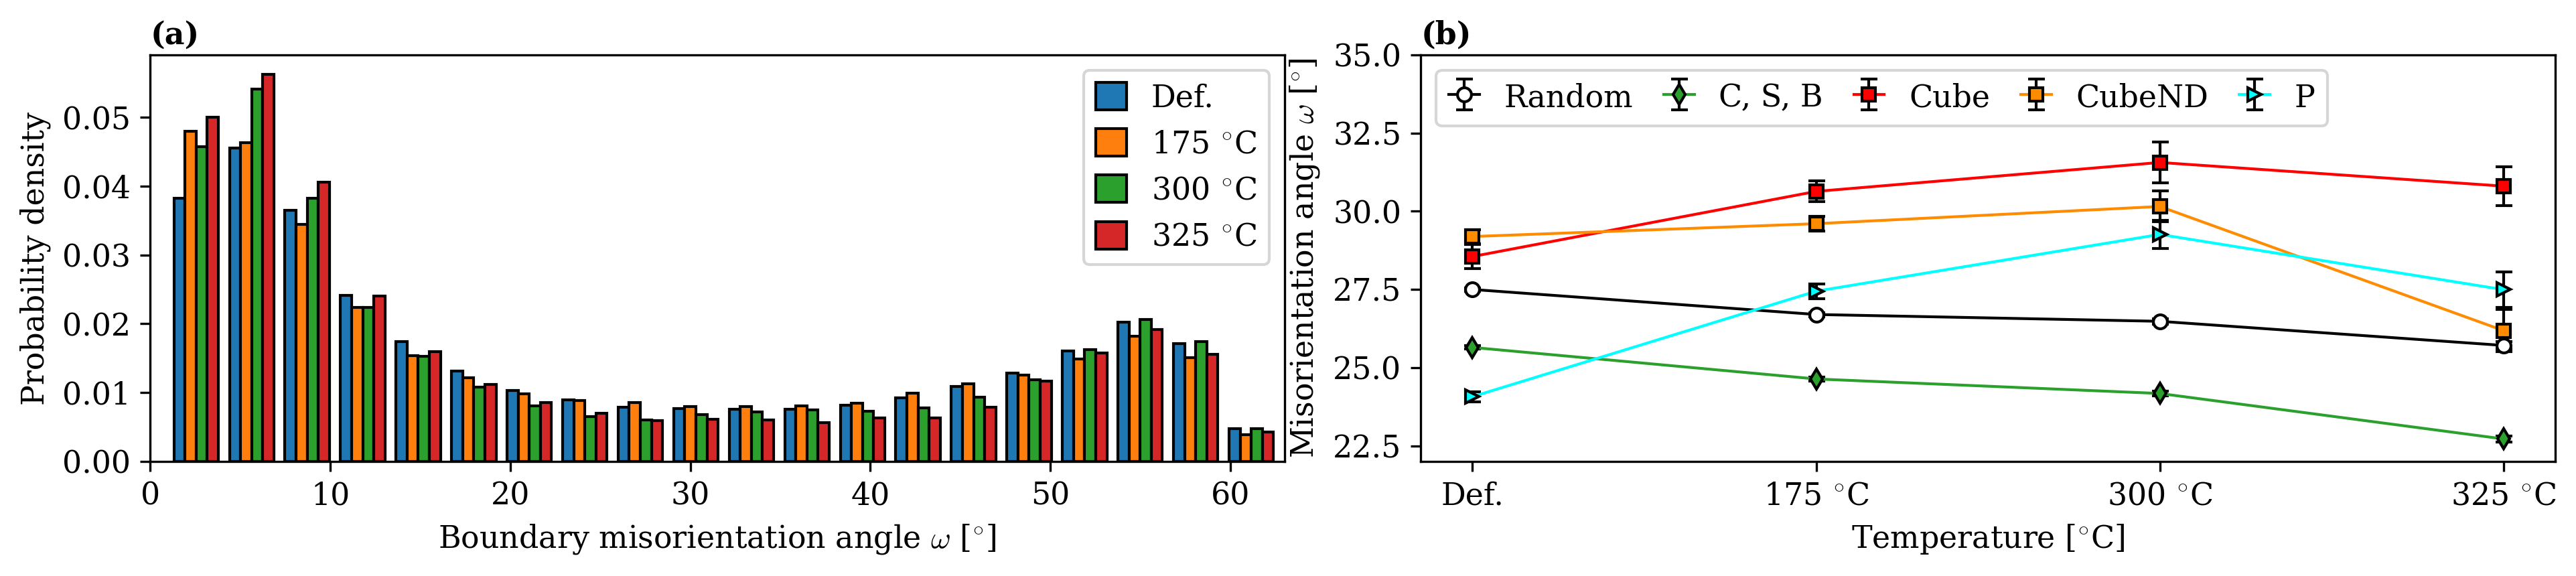

In [50]:
x = np.arange(len(grain_stats))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(13, 3))

# (a) Histogram
# -------------
ax0.hist([np.rad2deg(v.angle) for v in gbs.values()], label=titles, bins=20, density=True, ec="k")
ax0.set_xlabel("Boundary misorientation angle $\omega$ [$^{\circ}$]")
ax0.set_ylabel("Probability density")
ax0.set_xlim(0, 63)
ax0.legend(handleheight=1, handlelength=1)

# (b) Per component
# -----------------
for name, label in zip(
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
):
    if name == "Random":
        line_color = "k"
    else:
        line_color = comp_colors[label]
    ax1.errorbar(
        x,
        np.rad2deg(comp_gb_stats[f"mori_mean_{name.lower()}"]),
        yerr=np.rad2deg(comp_gb_stats[f"mori_confint_{name.lower()}"]),
        label=label,
        color=line_color,
        marker=comp_markers[label],
        markerfacecolor=comp_colors[label],
        **err_kw,
    )
ax1.set_xticks(x)
ax1.set_xticklabels(titles)
ax1.set_xlabel("Temperature [$^{\circ}$C]")
ax1.set_ylabel("Misorientation angle $\omega$ [$^{\circ}$]")
ax1.set_ylim(22, 35)
ax1.legend()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    ncol=5,
    loc="upper left",
    columnspacing=1,
    handleheight=1,
    handlelength=1,
)

# Labels
ax0.text(0, 1.01, "(a)", transform=ax0.transAxes, **title_kw)
ax1.text(0, 1.01, "(b)", transform=ax1.transAxes, **title_kw)

fig.tight_layout()
fig.savefig(os.path.join(dir_article, "misorientation_angles/mori_angle_hist_per_comp.pdf"), **savefig_kw)

Cumulative distribution of dispersoids' distance to a boundary

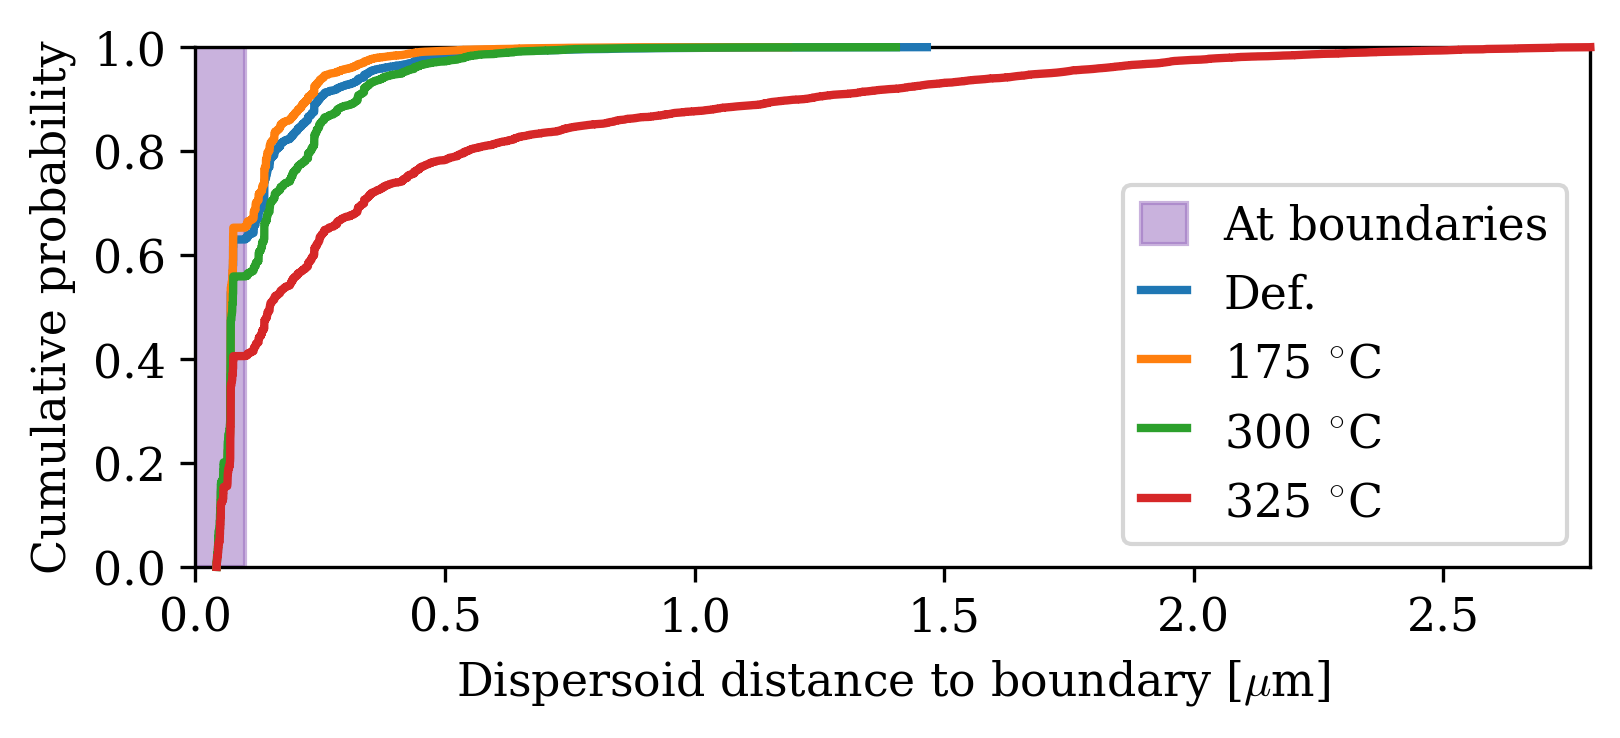

In [51]:
fig, ax = plt.subplots(figsize=(6, 2.25))
ax.set_xlabel(r"Dispersoid distance to boundary [$\mu$m]")
ax.set_ylabel("Cumulative probability")
ax.axvspan(0, 0.1, color="C4", alpha=0.5, zorder=0, label="At boundaries")
ax.set_ylim(0, 1)
x_max = 0
for i, sample in enumerate(identifier):
    x_max = max([dist_to_gb_sorted[sample].max(), x_max])
    ax.plot(dist_to_gb_sorted[sample], dist_to_gb_cdf[sample], lw=2, clip_on=False, zorder=5, label=titles[i])
ax.legend(loc="lower right", handleheight=1, handlelength=1)
ax.set_xlim(0, x_max)
fig.savefig(os.path.join(dir_article, "dispersoids_at_gb/dispersoid_distance_to_gb.pdf"), **savefig_kw)

Percent of dispersoids at boundaries

In [52]:
for sample in identifier:
    idx = np.where(dist_to_gb_sorted[sample] > 0.1)[0][0]
    print(sample, dist_to_gb_cdf[sample][idx])

0s 0.6315776775158636
175c 0.6556398186889819
300c 0.559409849008191
325c 0.4061832169824761


Total grain boundary area vs. area

In [53]:
total_area_gb = np.zeros(4)
for i, sample in enumerate(identifier):
    total_area_gb[i] = (gbs[sample].length * 2 * 0.1).sum()

In [54]:
total_area_gb / grain_stats["total_area"]

0s      0.533050
175c    0.556838
300c    0.396473
325c    0.319133
Name: total_area, dtype: float64

Calculate
* Number of dispersoids per boundary length as a function of boundary misorientation angle $\omega$, per temperature
* Dispersoid size per boundary length as a function of boundary misorientation angle

In [55]:
tinv = lambda confint, dof: abs(scs.t.ppf(confint / 2, dof))

# Number of dispersoids
disp_per_angle_length = {}
disp_per_angle_length_confint = {}
disp_per_angle_res = {}
disp_per_angle_ts = {}

# Dispersoid size
disp_size_per_angle_length = {}
disp_size_per_angle_length_confint = {}
disp_size_per_angle_res = {}
disp_size_per_angle_ts = {}

# Get min/max of angles in all datasets
angle_min = 63
angle_max = 0
for sample in identifier:
    angle_i = gbs[sample].angle
    angle_i_min, angle_i_max = angle_i.min(), angle_i.max()
    if angle_i_min < angle_min:
        angle_min = angle_i_min
    if angle_i_max > angle_max:
        angle_max = angle_i_max

n_bins = 30
bin_edges = np.linspace(angle_min, angle_max, n_bins + 1)
bin_means = np.convolve(bin_edges, np.ones(2), mode="valid") / 2
bin_means_deg = np.rad2deg(bin_means)

for sample in identifier:
    angle_i = gbs[sample].angle

    # Number of dispersoids per length
    # --------------------------------
    # Mean
    disp_per_angle_length_i, _, bin_num_i = scs.binned_statistic(
        x=angle_i,
        values=gbs[sample].dispersoids_per_length,
        statistic="mean",
        bins=bin_edges
    )
    # Standard deviation
    disp_per_angle_length_std_i = scs.binned_statistic(
        x=angle_i,
        values=gbs[sample].dispersoids_per_length,
        statistic="std",
        bins=bin_edges
    )[0]
    # 95% confidence interval
    n_gbs_i = np.unique(bin_num_i, return_counts=True)[1]
    disp_per_angle_length_confint_i = 1.96 * disp_per_angle_length_std_i / np.sqrt(n_gbs_i)
    # Linear regression with 95% confidence interval for intercept and slope
    res_i = scs.linregress(bin_means, disp_per_angle_length_i)
    ts_i = tinv(1 - 0.95, n_bins - 2)
    # Save for later
    disp_per_angle_length[sample] = disp_per_angle_length_i
    disp_per_angle_length_confint[sample] = disp_per_angle_length_confint_i
    disp_per_angle_res[sample] = res_i
    disp_per_angle_ts[sample] = ts_i
    
    # Dispersoid size per length
    # --------------------------
    # Mean
    disp_size_per_angle_length_i, _, bin_num_size_i = scs.binned_statistic(
        x=angle_i,
        values=gbs[sample].dispersoid_size_per_length,
        statistic="mean",
        bins=bin_edges
    )
    # Standard deviation
    disp_size_per_angle_length_std_i = scs.binned_statistic(
        x=angle_i,
        values=gbs[sample].dispersoid_size_per_length,
        statistic="std",
        bins=bin_edges
    )[0]
    # 95% confidence interval
    n_gbs_size_i = np.unique(bin_num_size_i, return_counts=True)[1]
    disp_size_per_angle_length_confint_i = 1.96 * disp_size_per_angle_length_std_i / np.sqrt(n_gbs_size_i)
    # Linear regression with 95% confidence interval for intercept and slope 
    res_size_i = scs.linregress(bin_means, disp_size_per_angle_length_i)
    ts_size_i = tinv(1 - 0.95, n_bins - 2)
    # Save for later
    disp_size_per_angle_length[sample] = disp_size_per_angle_length_i
    disp_size_per_angle_length_confint[sample] = disp_size_per_angle_length_confint_i
    disp_size_per_angle_res[sample] = res_size_i
    disp_size_per_angle_ts[sample] = ts_size_i

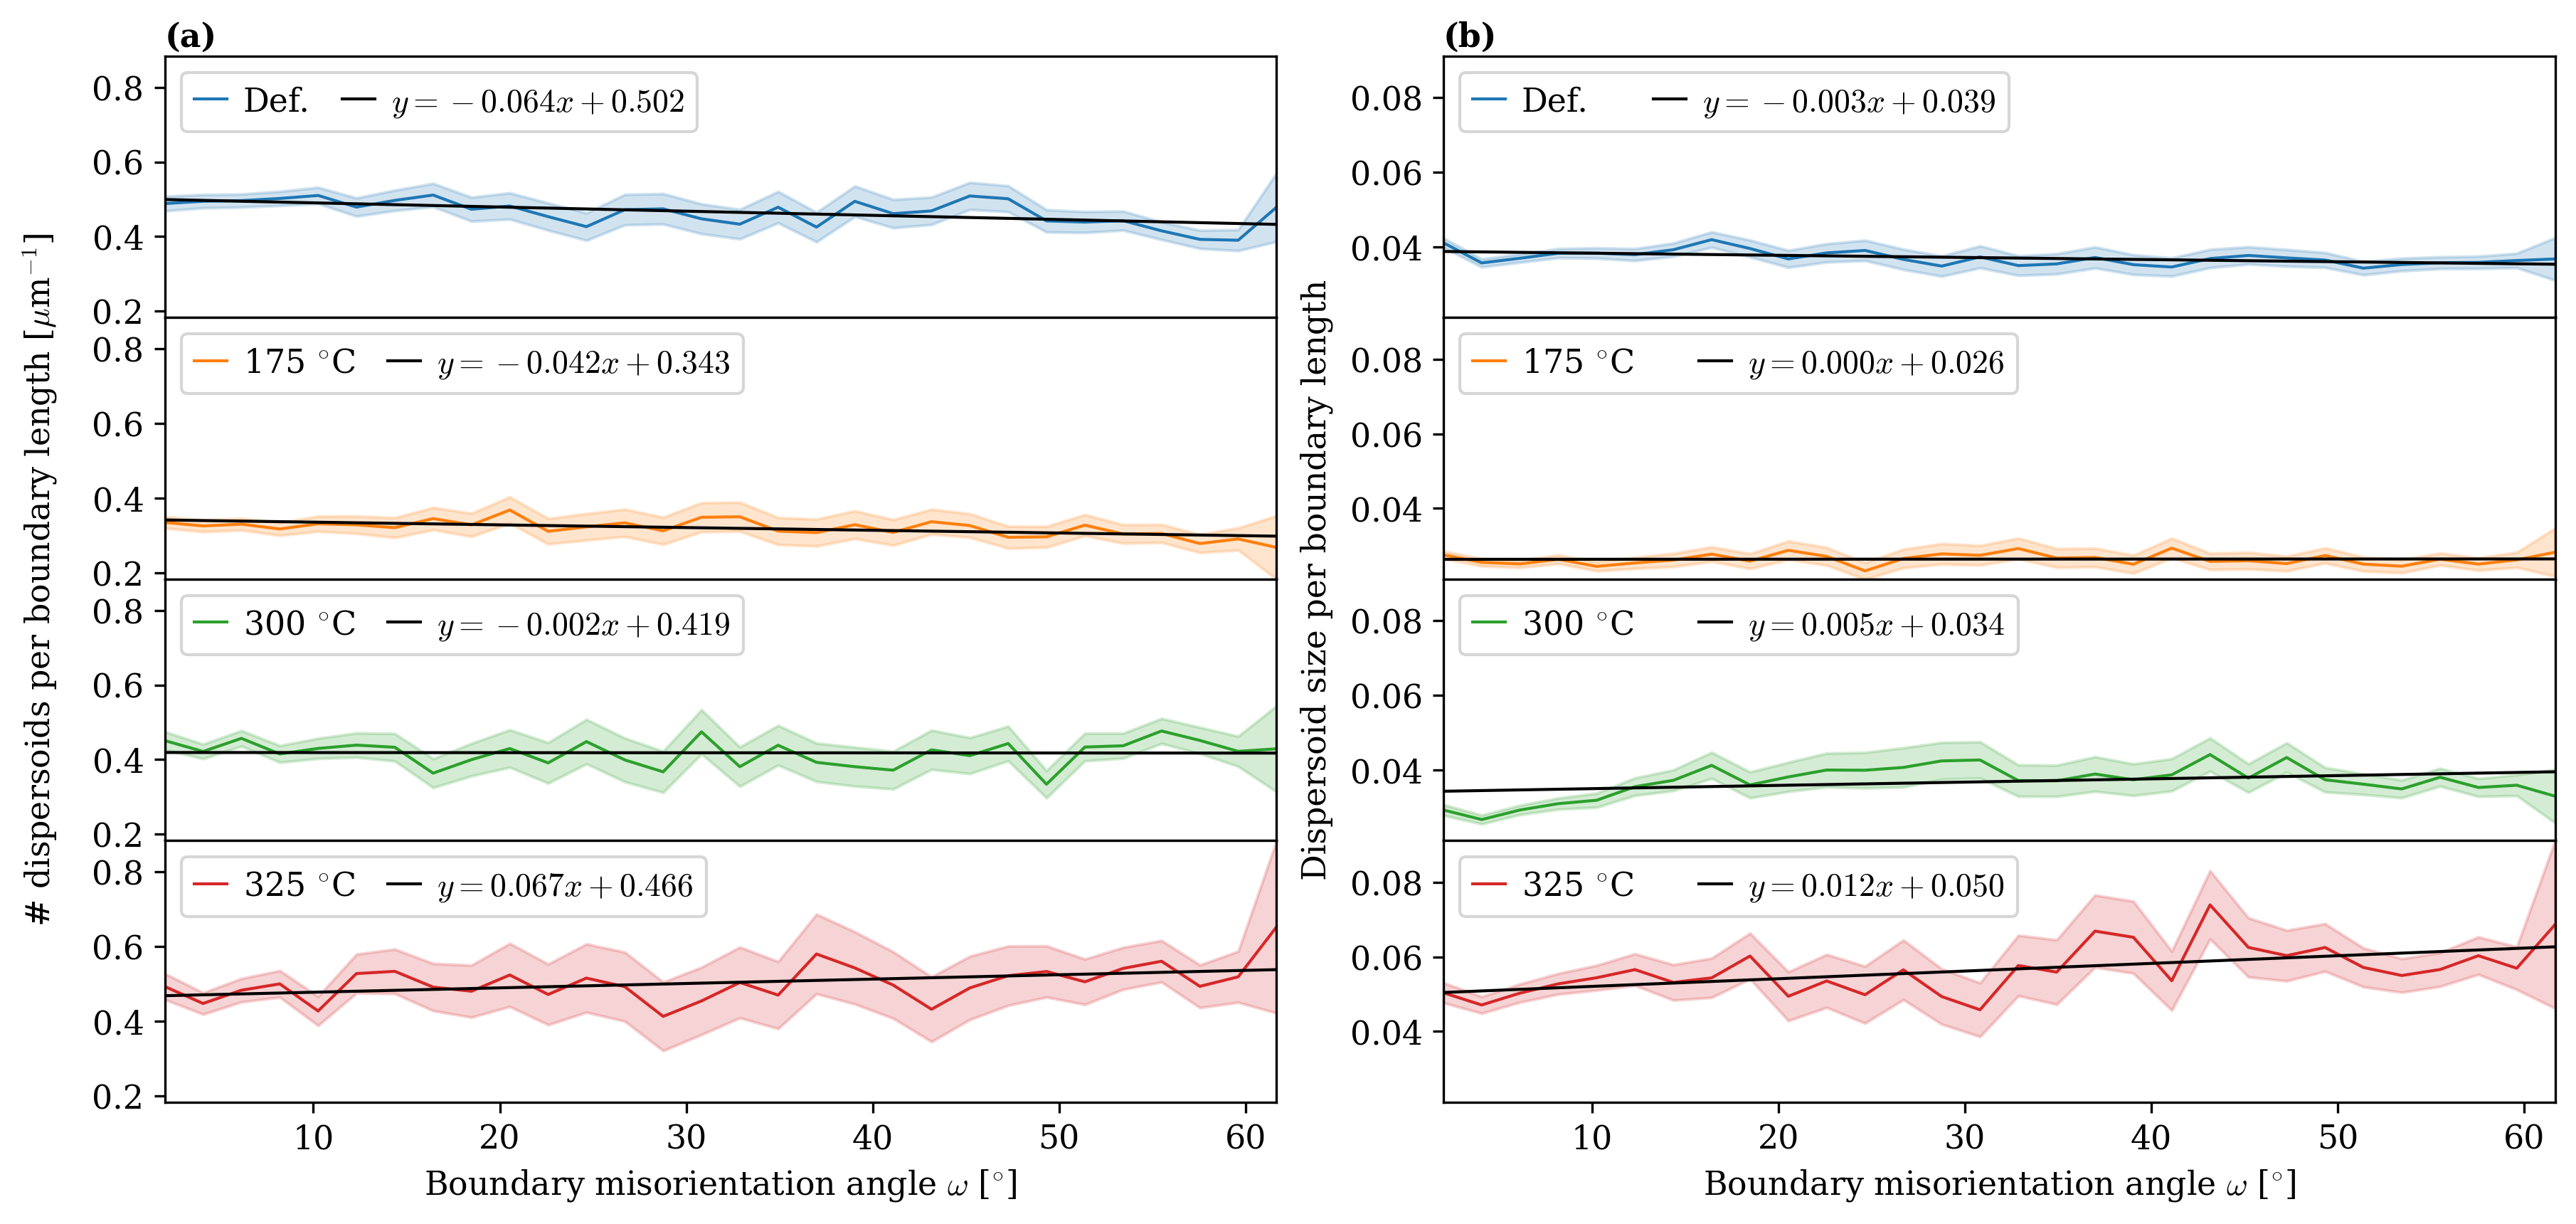

In [56]:
y1_min, y1_max = (1, 0)
y2_min, y2_max = (1, 0)

fig_ratio = 0.7
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(fig_ratio * 16, fig_ratio * 7), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0.15, left=0, bottom=0, right=1, top=1)
for i, sample in enumerate(identifier):
    angle_i = gbs[sample].angle

    # (a) Dispersoids per boundary length
    # -----------------------------------
    disp_per_angle_length_i = disp_per_angle_length[sample]
    disp_per_angle_length_confint_i = disp_per_angle_length_confint[sample]
    res_i = disp_per_angle_res[sample]
    ts_i = disp_per_angle_ts[sample]
    # Plot data
    ax[i, 0].fill_between(
        bin_means_deg,
        disp_per_angle_length_i - disp_per_angle_length_confint_i,
        disp_per_angle_length_i + disp_per_angle_length_confint_i,
        alpha=0.2,
        color=f"C{i}"
    )
    ax[i, 0].plot(bin_means_deg, disp_per_angle_length_i, f"C{i}-", label=titles[i])
    # Plot linear regression line
    if res_i.slope < 0:
        sign = "-"
    else:
        sign = "+"
    ax[i, 0].plot(
        bin_means_deg,
        res_i.intercept + res_i.slope * bin_means,
        "k-",
        label=fr"$y = {res_i.slope:.3f}x + {res_i.intercept:.3f}$",
    )
    # Legend
    ax[i, 0].legend(loc="upper left", ncol=2, handlelength=1, handletextpad=0.5, columnspacing=1)
    # Axes limits
    ax[i, 0].set_xlim(bin_means_deg.min(), bin_means_deg.max())
    y1_i_min = (disp_per_angle_length_i - disp_per_angle_length_confint_i).min()
    y1_i_max = (disp_per_angle_length_i + disp_per_angle_length_confint_i).max()
    if y1_i_min < y1_min:
        y1_min = y1_i_min
    if y1_i_max > y1_max:
        y1_max = y1_i_max

    # (b) Dispersoid size per boundary length
    # ---------------------------------------
    disp_size_per_angle_length_i = disp_size_per_angle_length[sample]
    disp_size_per_angle_length_confint_i = disp_size_per_angle_length_confint[sample]
    res_i = disp_size_per_angle_res[sample]
    ts_i = disp_size_per_angle_ts[sample]
    # Plot data
    ax[i, 1].fill_between(
        bin_means_deg,
        disp_size_per_angle_length_i - disp_size_per_angle_length_confint_i,
        disp_size_per_angle_length_i + disp_size_per_angle_length_confint_i,
        alpha=0.2,
        color=f"C{i}"
    )
    ax[i, 1].plot(bin_means_deg, disp_size_per_angle_length_i, f"C{i}-", label=titles[i])
    # Plot linear regression line
    if res_i.slope < 0:
        sign = "-"
    else:
        sign = "+"
    ax[i, 1].plot(
        bin_means_deg,
        res_i.intercept + res_i.slope * bin_means,
        "k-",
        label=fr"$y = {res_i.slope:.3f}x + {res_i.intercept:.3f}$",
    )
    # Legend
    ax[i, 1].legend(loc="upper left", ncol=2, handlelength=1, handletextpad=0.5)
    # Axes limits
    ax[i, 1].set_xlim(bin_means_deg.min(), bin_means_deg.max())
    y2_i_min = (disp_size_per_angle_length_i - disp_size_per_angle_length_confint_i).min()
    y2_i_max = (disp_size_per_angle_length_i + disp_size_per_angle_length_confint_i).max()
    if y2_i_min < y2_min:
        y2_min = y2_i_min
    if y2_i_max > y2_max:
        y2_max = y2_i_max
    
for a in ax[:, 0]:
    a.set_ylim(y1_min, y1_max)
for a in ax[:, 1]:
    a.set_ylim(y2_min, y2_max)
ax[3, 0].set_xlabel(r"Boundary misorientation angle $\omega$ [$^{\circ}$]")
ax[3, 1].set_xlabel(r"Boundary misorientation angle $\omega$ [$^{\circ}$]")
fig.text(-0.06, 0.5, r"# dispersoids per boundary length [$\mu$m$^{-1}$]", rotation=90, va="center")
fig.text(0.475, 0.5, r"Dispersoid size per boundary length", rotation=90, va="center")
fig.text(0, 1.01, "(a)", transform=ax[0, 0].transAxes, **title_kw)
fig.text(0, 1.01, "(b)", transform=ax[0, 1].transAxes, **title_kw)

fig.savefig(os.path.join(dir_article, "dispersoids_at_gb/dispersoids_at_gb_per_angle.pdf"), **savefig_kw);

Plot number of dispersoids and dispersoids size per texture component boundary

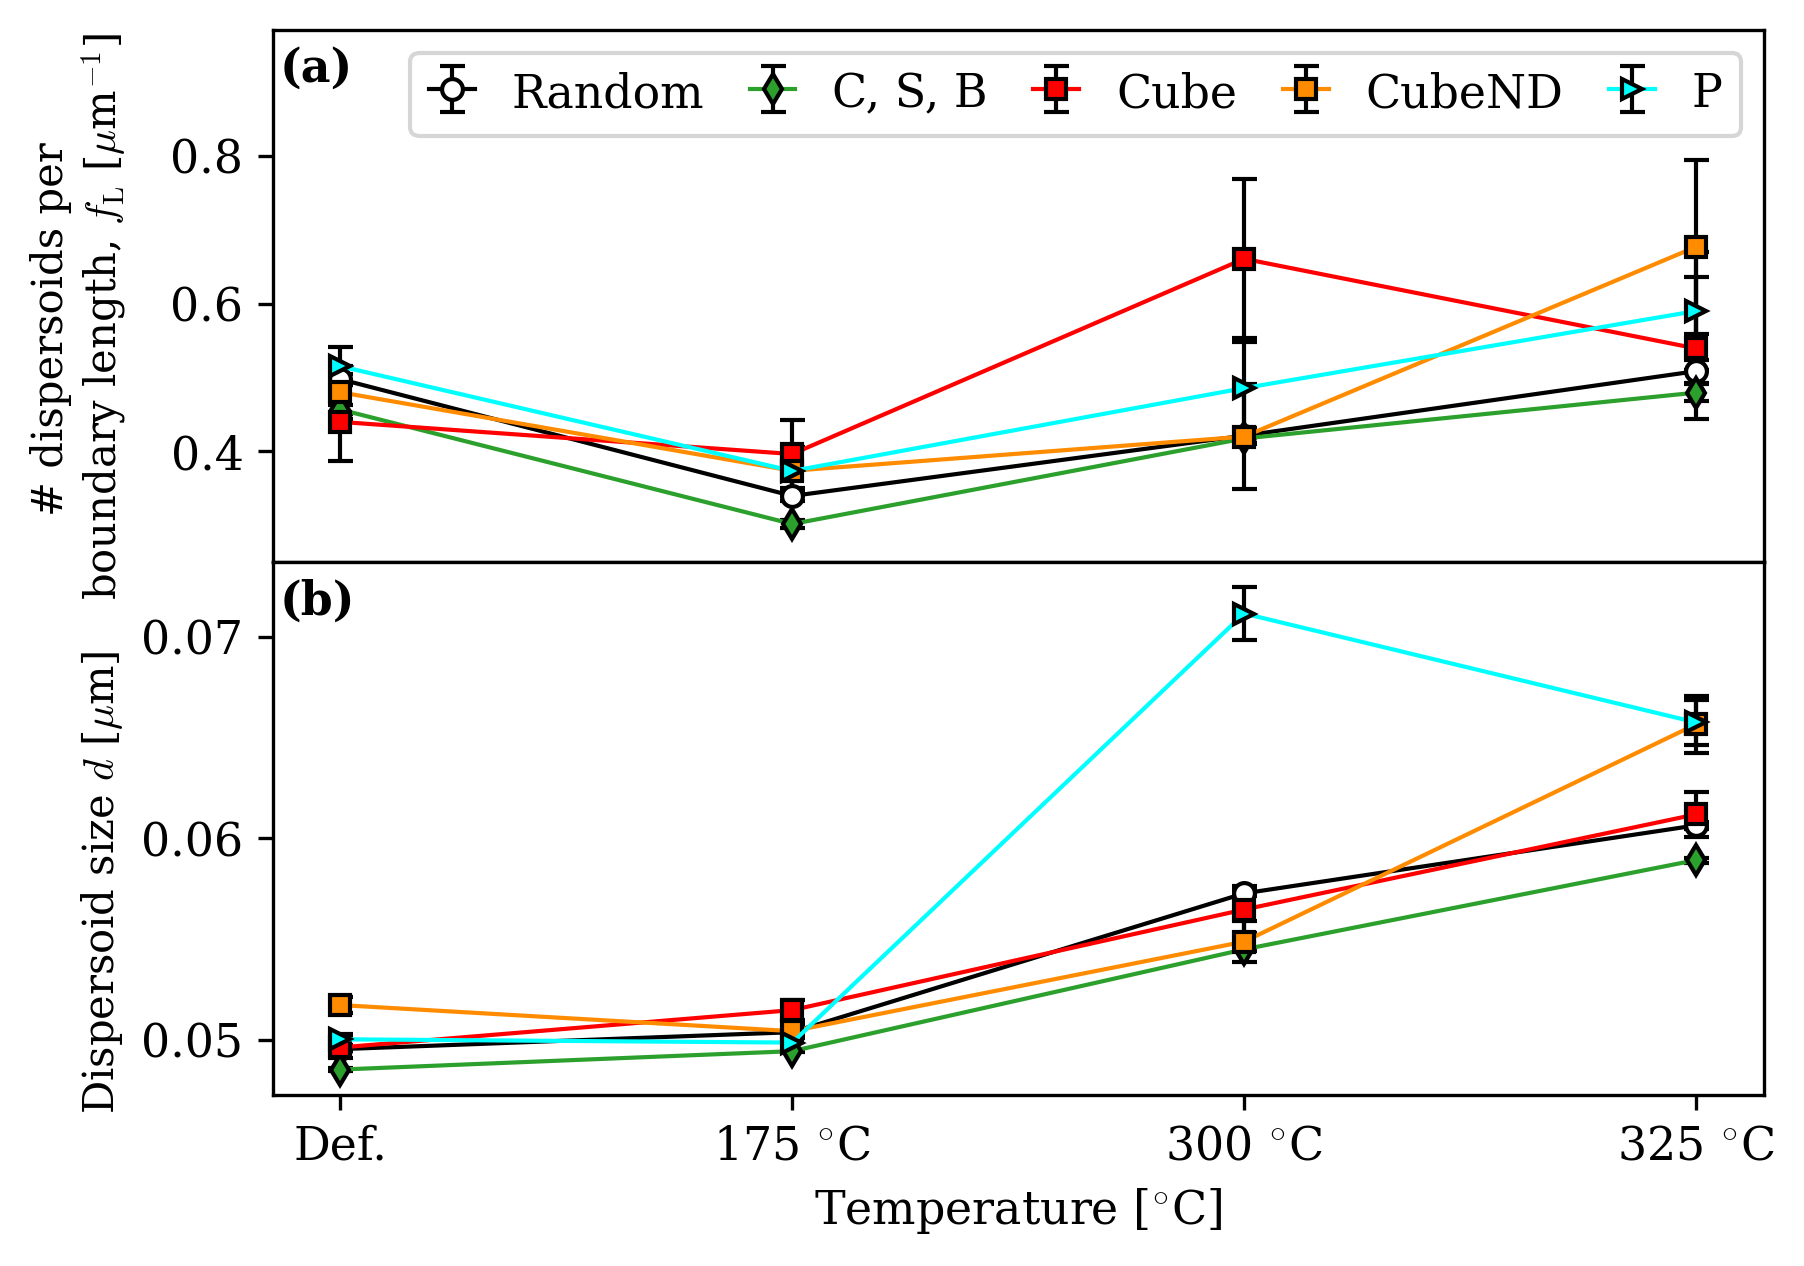

In [57]:
x = np.arange(len(grain_stats))

fig_ratio = 0.71
figsize = tuple(fig_ratio * np.array((7, 5)))
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=figsize, sharex=True)
fig.subplots_adjust(hspace=0, wspace=0.15, left=0, bottom=0, right=1, top=1)

# (a) Dispersoids per boundary length
# -----------------------------------
for name, label in zip(
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
):
    if name == "Random":
        line_color = "k"
    else:
        line_color = comp_colors[label]
    ax0.errorbar(
        x,
        comp_gb_stats[f"disp_per_length_mean_{name.lower()}"],
        yerr=comp_gb_stats[f"disp_per_length_confint_{name.lower()}"],
        label=label,
        marker=comp_markers[label],
        color=line_color,
        markerfacecolor=comp_colors[label],
        **err_kw,
    )
ax0.set_xticks(x)
ax0.set_ylabel(
    "# dispersoids per \n boundary length, $f_{\mathrm{L}}$ [$\mu$m$^{-1}$]",
    fontsize=plt.rcParams["font.size"] - 1,
    y=0.45,
    labelpad=10
)
ax0.legend()
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(
    ncol=5,
    loc="upper right",
    columnspacing=1,
    handleheight=1,
    handlelength=1,
)

# (b) Dispersoid size
# -------------------
for name, label in zip(
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7]
):
    if name == "Random":
        line_color = "k"
    else:
        line_color = comp_colors[label]
    ax1.errorbar(
        x,
        comp_gb_stats[f"disp_size_mean_{name.lower()}"],
        yerr=comp_gb_stats[f"disp_size_confint_{name.lower()}"],
        label=label,
        marker=comp_markers[label],
        color=line_color,
        markerfacecolor=comp_colors[label],
        **err_kw,
    )
ax1.set_xticks(x)
ax1.set_xticklabels(titles)
ax1.set_xlabel("Temperature [$^{\circ}$C]")
ax1.set_ylabel(
    "Dispersoid size $d$ [$\mu$m]",
    fontsize=plt.rcParams["font.size"] - 1,
    y=0.4
)

# Labels
title_kw2 = title_kw.copy()
title_kw2["va"] = "top"
ax0.text(0.005, 0.97, "(a)", transform=ax0.transAxes, **title_kw2)
ax1.text(0.005, 0.97, "(b)", transform=ax1.transAxes, **title_kw2);

# Axes limits
ax0.set_ylim(0.25, 0.97)

fig.savefig(os.path.join(dir_article, "dispersoids_at_gb/dispersoids_at_gb_per_comp.pdf"), **savefig_kw)

## Smith-Zener drag $P'_{\mathrm{sb}}$

$$
P'_{\mathrm{sb}} = \frac{\gamma_{\mathrm{sb}}f_{\mathrm{L}}D_{\mathrm{A}}}{2d} \propto \frac{f_{\mathrm{L}}D_{\mathrm{A}}}{d}
$$

Also calculate $P_\mathrm{D}$ for all subgrains, deformation subgrains and per component

$$
P_{\mathrm{D}} \sim 3\frac{\gamma_{\mathrm{sb}}}{D_{\mathrm{A}}},
$$

$$
\gamma_{\mathrm{sb}} = \gamma_{\mathrm{HAGB}} \frac{\omega}{\omega_{\mathrm{HAGB}}}\left(1 - \ln\frac{\omega}{\omega_{\mathrm{HAGB}}}\right).
$$

In [58]:
# Data frame columns
column_names = ["p_sz_prop", "p_sz_prop_delta", "gamma_sb", "p_d", "p_d_delta"]
columns = []
for col in column_names:
    for comp_name in comp_names_low[:-1] + ["all", "def"]:
        columns.append(col + "_" + comp_name)
pressure_stats = pd.DataFrame(
    np.zeros((len(identifier), len(columns))),
    index=identifier,
    columns=columns,
)

mori_hagb = np.deg2rad(15)  # Radians
gamma_hagb = 0.625  # J / m^2

for name in comp_names_low[:-1] + ["all", "def"]:
    # f_L
    # ---
    f_L_i = comp_gb_stats[f"disp_per_length_mean_{name}"]
    f_L_delta_i = comp_gb_stats[f"disp_per_length_confint_{name}"]

    # D_A
    # ---
    D_A_i = grain_stats[f"ecd_mean_{name}"]
    D_A_delta_i = grain_stats[f"ecd_confint_{name}"]

    # d
    # -
    d_average_i = comp_gb_stats[f"disp_size_mean_{name}"]
    d_average_delta_i = comp_gb_stats[f"disp_size_confint_{name}"]

    # P'_sb prop
    # ----------
    pressure_stats[f"p_sz_prop_{name}"] = f_L_i * D_A_i / d_average_i
    pressure_stats[f"p_sz_prop_delta_{name}"] = pressure_stats[f"p_sz_prop_{name}"] * np.sqrt(
        (f_L_delta_i / f_L_i) ** 2
        + (D_A_delta_i / D_A_i) ** 2
        + (-d_average_delta_i / d_average_i) ** 2
    )

    # P_D
    # ---
    mori_i = comp_gb_stats[f"mori_mean_{name}"]
    gamma_i = gamma_hagb * (mori_i / mori_hagb) * (1 - np.log(mori_i / mori_hagb))
    pressure_stats[f"gamma_sb_{name}"] = gamma_i
    pressure_stats[f"p_d_{name}"] = 3 * gamma_i / (D_A_i * 1e-6)
    pressure_stats[f"p_d_delta_{name}"] = pressure_stats[f"p_d_{name}"] * np.sqrt((-D_A_delta_i / D_A_i) ** 2)

    # P'_sb
    # -----
    pressure_stats[f"p_sz_{name}"] = pressure_stats[f"p_sz_prop_{name}"] * 1e6 * gamma_i / 2
    pressure_stats[f"p_sz_delta_{name}"] = pressure_stats[f"p_sz_prop_delta_{name}"] * 1e6 / 2

In [59]:
comp_gb_stats[["mori_mean_cube", "mori_mean_cubend", "mori_mean_p"]]

mori_mean_cube  mori_mean_cubend  mori_mean_p
0s          0.498326          0.509474     0.420095
175c        0.534660          0.516649     0.478964
300c        0.550819          0.526252     0.510660
325c        0.537610          0.456996     0.479833

In [60]:
pressure_stats[["gamma_sb_cube", "gamma_sb_cubend", "gamma_sb_p"]]

gamma_sb_cube  gamma_sb_cubend  gamma_sb_p
0s         0.423906         0.406480    0.528627
175c       0.364985         0.394956    0.452750
300c       0.336862         0.379159    0.404592
325c       0.359938         0.483207    0.451495

In [61]:
pressure_stats[[f"p_sz_prop_{n}" for n in ["cube", "cubend", "p"]]] 

p_sz_prop_cube  p_sz_prop_cubend  p_sz_prop_p
0s          6.666340          6.396917     7.071009
175c        5.641581          5.595757     4.476148
300c       14.653930          7.238325     7.075375
325c       17.574437         11.496747    10.628522

In [62]:
pressure_stats[[f"p_sz_prop_{n}" for n in ["cube", "cubend"]]].values / pressure_stats["p_sz_prop_p"].values[:, None]

array([[0.94277069, 0.90466815],
       [1.26036522, 1.25012788],
       [2.07111704, 1.02303056],
       [1.65351651, 1.08168813]])

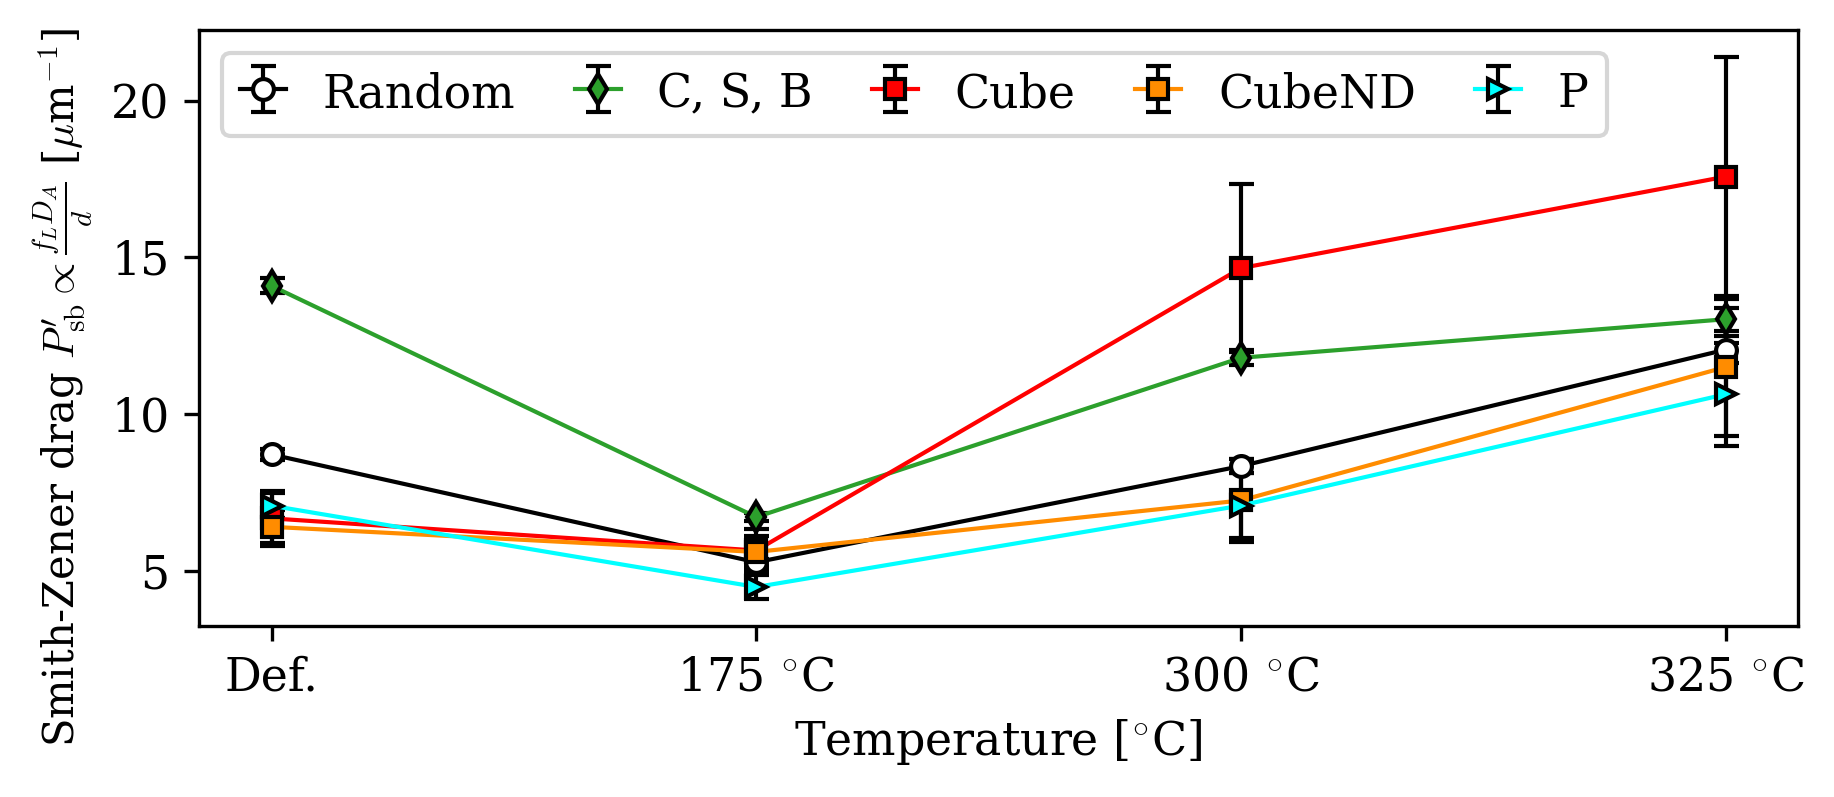

In [63]:
x = np.arange(len(grain_stats))

fig_ratio = 0.86
fig, ax = plt.subplots(figsize=(fig_ratio * 8, fig_ratio * 3))
for name, label in zip(
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
):
    if name == "Random":
        line_color = "k"
    else:
        line_color = comp_colors[label]
    ax.errorbar(
        x,
        pressure_stats[f"p_sz_prop_{name.lower()}"],
        yerr=pressure_stats[f"p_sz_prop_delta_{name.lower()}"],
        label=label,
        marker=comp_markers[label],
        color=line_color,
        markerfacecolor=comp_colors[label],
        **err_kw,
    )
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.set_xlabel("Temperature [$^{\circ}$C]")
ax.set_ylabel(
    r"Smith-Zener drag $P_{\mathrm{sb}}' \propto \frac{f_L D_A}{d}$ [$\mu$m$^{-1}$]",
    y=0.4,
    fontsize=plt.rcParams["font.size"] - 1
)
ax.legend(
    ncol=5,
    loc="upper left",
    columnspacing=1.3,
    handleheight=1,
    handlelength=1,
)

fig.savefig(os.path.join(dir_article, "smith_zener_drag/smith_zener_drag.pdf"), **savefig_kw)

### Competition between driving pressures $P_{\mathrm{D}}$ and $P'_{\mathrm{sb}}$

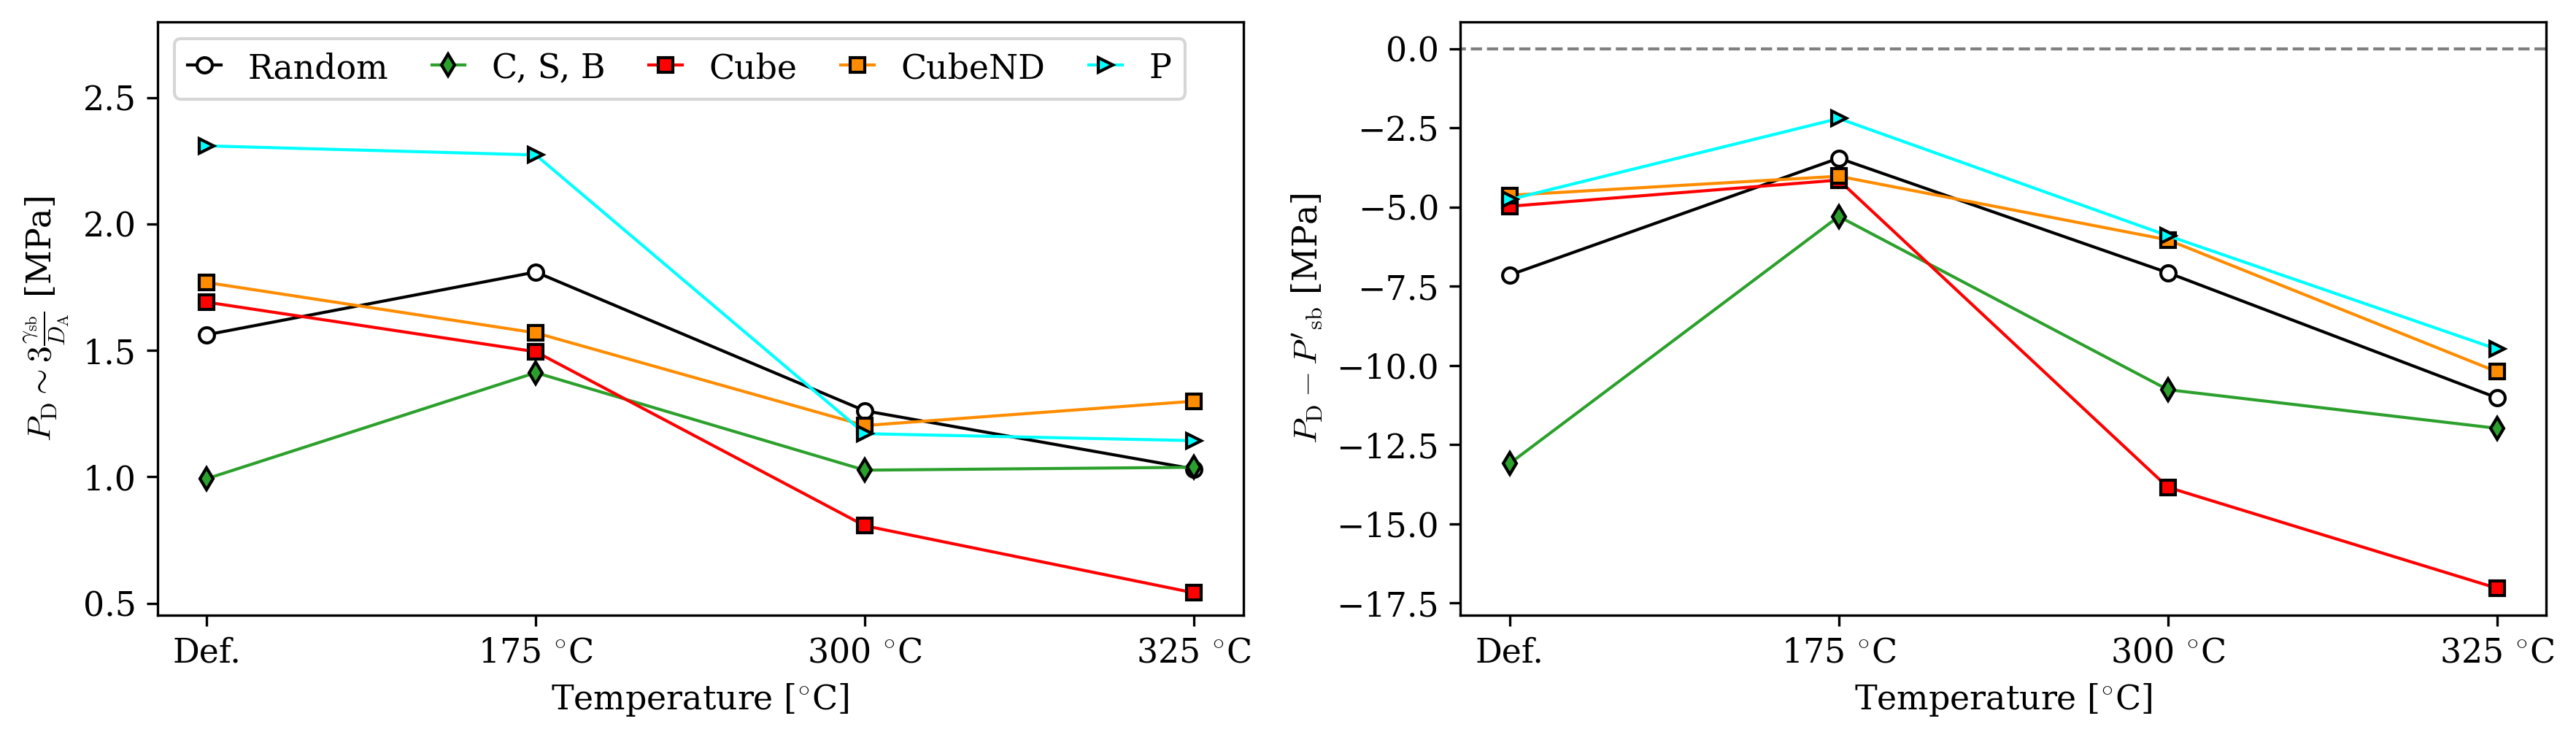

In [64]:
x = np.arange(len(grain_stats))

fig_ratio = 0.88
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(2 * fig_ratio * 8, fig_ratio * 4))
for name, label in zip(
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
):
    if name == "Random":
        line_color = "k"
    else:
        line_color = comp_colors[label]
    ax0.plot(
        x,
        pressure_stats[f"p_d_{name.lower()}"] * 1e-6,
        label=label,
        marker=comp_markers[label],
        color=line_color,
        markerfacecolor=comp_colors[label],
        markeredgecolor="k",
    )
    ax1.plot(
        x,
        pressure_stats[f"p_d_{name.lower()}"] * 1e-6 - pressure_stats[f"p_sz_prop_{name.lower()}"],
        label=label,
        marker=comp_markers[label],
        color=line_color,
        markerfacecolor=comp_colors[label],
        markeredgecolor="k",
    )
x_lims = ax1.get_xlim()
ax1.plot([x.min() - 1, x.max() + 1], [0, 0], "--", c="gray")
ax1.set_xlim(x_lims)
for a in (ax0, ax1):
    a.set_xticks(x)
    a.set_xticklabels(titles)
    a.set_xlabel("Temperature [$^{\circ}$C]")
ax0.set_ylabel(r"$P_{\mathrm{D}} \sim 3\frac{\gamma_{\mathrm{sb}}}{D_{\mathrm{A}}}$ [MPa]")
ax1.set_ylabel(r"$P_{\mathrm{D}} - P'_{\mathrm{sb}}$ [MPa]")
ax0.set_ylim(ax0.get_ylim()[0], 2.8)
ax0.legend(
    ncol=5,
    loc="upper left",
    columnspacing=1.3,
    handleheight=1,
    handlelength=1,
);

### Interparticle spacing $n_{\mathrm{s}}^{-0.5}$

In [76]:
interparticle_spacing = particle_stats["nn_distance_grid_d"]
interparticle_spacing

0s      0.608402
175c    0.642684
300c    0.628736
325c    0.558710
Name: nn_distance_grid_d, dtype: float64

In [77]:
100 * interparticle_spacing / grain_stats["ecd_mean_all"]

0s      47.847065
175c    65.938538
300c    44.098416
325c    36.237804
dtype: float64

## Subgrains at constituent particles

Number of subgrains by constituent particles and their sizes per sample

In [78]:
# Data frame columns
column_names = ["n", "ecd_area"]
columns = []
for col in column_names:
    for comp_name in comp_names_low[:-1] + ["all", "def"]:
        columns.append(col + "_" + comp_name)
grains_at_constituent = pd.DataFrame(
    np.zeros((len(identifier), len(columns))),
    index=identifier,
    columns=columns,
)

for sample in identifier:
    for i, name in zip(np.append(ideal_id, [-1, -1]), comp_names_low[:-1] + ["all", "def"]):
        grains_i = grains[sample]
        if name == "all":
            i = ideal_id
        elif name == "def":
            i = ideal_id_def
        elif name == "random":
            i = ideal_id_rand

        grains_at_constituent_comp = grains_i[
            (grains_i.at_constituent_particle) & (np.isin(grains_i.ideal, i)) & (~grains_i.is_rx)
        ]

        grains_at_constituent.loc[sample][f"n_{name}"] = len(grains_at_constituent_comp)
        grains_at_constituent.loc[sample][f"ecd_area_{name}"] = np.average(
            grains_at_constituent_comp.ecd, weights=grains_at_constituent_comp.area
        )

Plot number of subgrains at constituent particles as a function of texture component

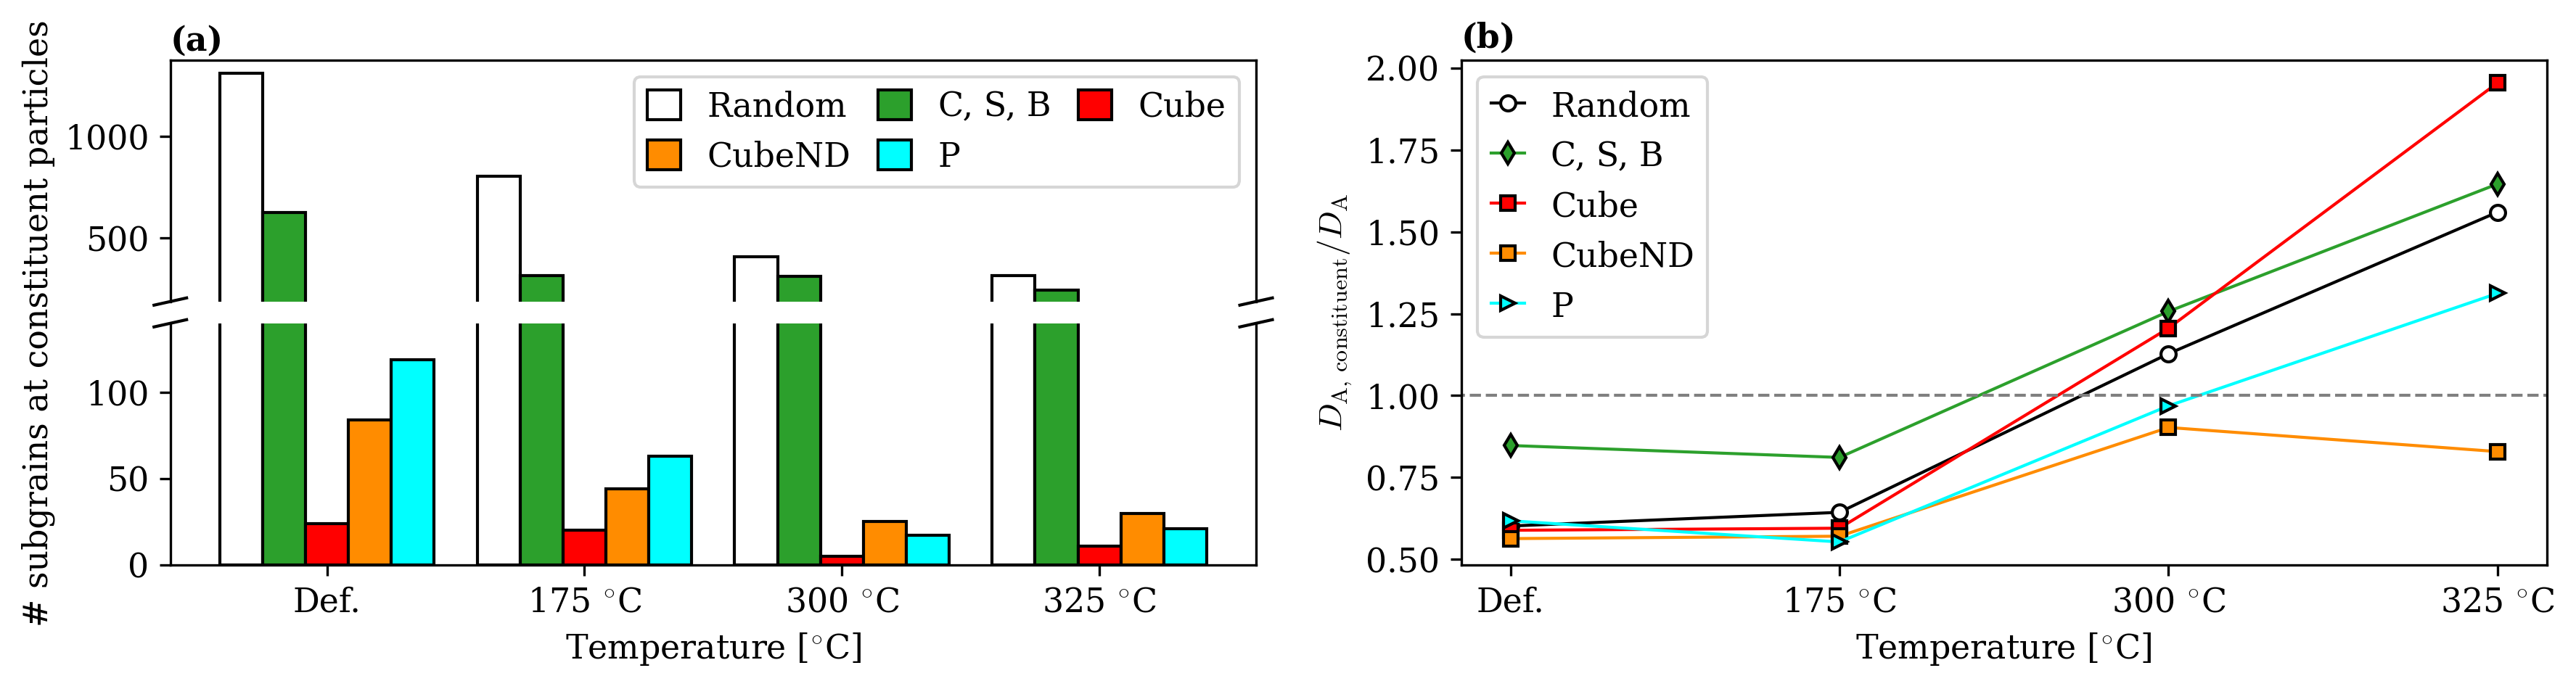

In [79]:
x = np.arange(len(grain_stats))
bar_width = 1 / 6
bar_kw = dict(width=bar_width, ec="k")

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 3.3))

# (a) Subgrains at constituent particles
# --------------------------------------
divider = make_axes_locatable(ax0)
ax01 = divider.new_vertical(size="100%", pad=0.1)
fig.add_axes(ax01)
for w, name, label in zip(
    [-2 * bar_width, -bar_width, 0, bar_width, 2 * bar_width],
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
):
    c = comp_colors[label]
    ax0.bar(x + w, grains_at_constituent[f"n_{name.lower()}"], label=label, color=c, **bar_kw)
    ax01.bar(x + w, grains_at_constituent[f"n_{name.lower()}"], label=label, color=c, **bar_kw)
# Broken axis
ax01.tick_params(bottom=False, labelbottom=False)
ax0.spines["top"].set_visible(False)
ax01.spines["bottom"].set_visible(False)
ax0.set_ylim(0, 140)
ax01.set_ylim(190)
d = 0.015
kwargs = dict(transform=ax01.transAxes, color='k', clip_on=False)
ax01.plot((-d, d), (-d, d), **kwargs)
ax01.plot((1 - d, 1 + d), (-d, d), **kwargs)
kwargs.update(transform=ax0.transAxes)
ax0.plot((-d, d), (1 - d, 1 + d), **kwargs)
ax0.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
# Axes labels
ax0.set_xticks(x)
ax0.set_xticklabels(titles)
ax0.set_xlabel("Temperature [$^{\circ}$C]")
ax0.set_ylabel("# subgrains at constituent particles", y=1, labelpad=10);
# Legend (reorder)
ax01.legend()
handles, labels = ax01.get_legend_handles_labels()
order = [0, 3, 1, 4, 2]
ax01.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    ncol=3,
    loc="upper right",
    columnspacing=0.83,
    handleheight=1,
    handlelength=1,
)

# (b) Ratio of grain sizes of subgrains at constituent particles over grain sizes elsewhere
# -----------------------------------------------------------------------------------------
for name, label in zip(
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
):
    if name == "Random":
        line_color = "k"
    else:
        line_color = comp_colors[label]
    ax1.plot(
        x,
        grains_at_constituent[f"ecd_area_{name.lower()}"],
        label=label,
        marker=comp_markers[label],
        color=line_color,
        markerfacecolor=comp_colors[label],
        markeredgecolor="k",
    )
x_lims = ax1.get_xlim()
ax1.plot([x.min() - 1, x.max() + 1], [1, 1], "--", c="gray")
ax1.set_xlim(x_lims)
# Axes labels and ticks
ax1.set_xticks(x)
ax1.set_xticklabels(titles)
ax1.set_xlabel("Temperature [$^{\circ}$C]")
ax1.set_ylabel(r"$D_{\mathrm{A,\:constituent}} / D_{\mathrm{A}}$")

# Legend
ax1.legend()
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    loc="upper left",
    handleheight=1,
    handlelength=1,
)

# Figure labels
ax01.text(0, 1.01, "(a)", transform=ax01.transAxes, **title_kw)
ax1.text(0, 1.01, "(b)", transform=ax1.transAxes, **title_kw)

fig.tight_layout(w_pad=2)
fig.savefig(os.path.join(dir_article, "subgrains_at_constituent/n_grains_grain_size.pdf"), **savefig_kw)

## Pinning of recrystallized grains

Grains

In [87]:
# Data frame columns
columns = ["total_area"]
other_columns = ["fv", "n_grains"]
for col in other_columns:
    for comp_name in comp_names_low[:-1] + ["all", "def"]:
        columns.append(col + "_" + comp_name)
# Empty data frame
grain_stats_rx = pd.DataFrame(
    np.zeros((len(identifier), len(columns))),
    index=identifier,
    columns=columns,
)

for sample in identifier:
    # Grains at this temperature
    grains_i = grains[sample]

    # Grain stats (unfilled) at this temperature
    grain_stats_i = grain_stats_rx.loc[sample]

    # Total area of all grains and particles at this temperature (in microns squared)
    grain_stats_i["total_area"] = np.sum(grains_i.area)

    # Consider only grains (not particles)
    grains_i = grains_i[grains_i.phase == 1]

    # Consider only recrystallized grains
    if not grains_i.is_rx.any():
        continue
    grains_i = grains_i[grains_i.is_rx]

    # Components present, and how many there are of them, at this temperature
    ideal_unique_j, n_grains_j = np.unique(grains_i.ideal, return_counts=True)
    
    comp_names_i = list(np.array(comp_names_low[:-1])[np.isin(ideal_id, ideal_unique_j)])
    
    for comp_id, name in zip(
        np.append(ideal_unique_j, [-1, -1]), comp_names_i + ["all", "def"]
    ):
        if name == "all":
            comp_id = ideal_unique_j
        elif name == "def":
            comp_id = ideal_id_def

        # Grains of this component
        grains_j = grains_i[np.isin(grains_i.ideal, comp_id)]
        n_grains_j = len(grains_j)
        if n_grains_j == 0:
            continue
        
        # Volume fraction of component
        # ----------------------------
        area_j = grains_j.area
        grain_stats_i["fv_" + name] = area_j.sum() / grain_stats_i["total_area"]

        # Number of grains
        # ----------------
        grain_stats_i["n_grains_" + name] = n_grains_j

Sanity check: recrystallized fraction from EBSD maps (about 40%)

In [88]:
grain_stats_rx.loc["325c"][[f"fv_{n}" for n in ["random", "c", "b", "s", "cube", "cubend", "p"]]]

fv_random    0.163439
fv_c         0.006209
fv_b         0.000000
fv_s         0.065007
fv_cube      0.010372
fv_cubend    0.062250
fv_p         0.091234
Name: 325c, dtype: float64

In [89]:
np.sum([grain_stats_rx.loc["325c"][f"fv_{n}"] for n in ["random", "c", "b", "s", "cube", "cubend", "p"]])

0.39851046539912915

Number of grains

In [90]:
print(grain_stats_rx.loc["325c"][[f"n_grains_{n}" for n in ["random", "c", "b", "s", "cube", "cubend", "p"]]].sum())
print(grain_stats_rx.loc["325c"][[f"n_grains_{n}" for n in ["random", "c", "b", "s", "cube", "cubend", "p"]]])

17.0
n_grains_random    6.0
n_grains_c         2.0
n_grains_b         0.0
n_grains_s         1.0
n_grains_cube      2.0
n_grains_cubend    2.0
n_grains_p         4.0
Name: 325c, dtype: float64


Grain boundaries

In [91]:
gbs_rx = {}

# --- Dispersoid statistics per texture component
# Data frame columns
other_columns = [
    "disp_per_length_mean", "disp_per_length_var", "disp_per_length_confint",
    "disp_size_mean", "disp_size_var", "disp_size_confint",
    "disp_size_per_length_mean", "disp_size_per_length_var", "disp_size_per_length_confint",
    "length",
]
columns = []
for col in other_columns:
    for comp_name in comp_names_low[:-1] + ["all", "def"]:
        columns.append(col + "_" + comp_name)
comp_gb_rx_stats = pd.DataFrame(
    np.zeros((len(identifier), len(columns))),
    index=identifier,
    columns=columns,
)

for sample in identifier:
    for j in range(3):
        # Read data from file
        gb_j = pd.read_csv(
            os.path.join(dir_data, f"prover/{sample}/{j + 1}/mtex/grain_boundaries.txt"),
            delimiter=","
        )
        
        # Create new data frame or add to existing
        if j == 0:
            gb_i = gb_j
        else:
            gb_i = pd.concat((gb_i, gb_j))

    # Keep only RX boundaries
    if not gb_i.is_rx.any():
        continue
    gb_i = gb_i[gb_i.is_rx == 1]
            
    # Relevant statistics
    gb_i["dispersoids_per_length"] = gb_i.n_dispersoids_close / gb_i.length
    gb_i["dispersoid_size_per_length"] = gb_i.dispersoids_close_size / gb_i.length
    gb_i["at_constituent_particle"] = gb_i.at_constituent_particle.astype(bool)

    gbs_rx[sample] = gb_i
    
    # Per texture component (and all and deformation subgrains)
    comp1 = gb_i.component1
    comp2 = gb_i.component2
    for k, name in zip(np.append(ideal_id, [-1,] * 4), comp_names_low[:-1] + ["all", "def", "csl3", "csl7"]):
        if name == "all":
            k = ideal_id
        elif name == "def":
            k = ideal_id_def

        gb_k = gb_i[np.isin(comp1, k) | np.isin(comp2, k)]

        n_gb_k = len(gb_k)
        if n_gb_k == 0:
            continue
        n_gb_k_sqrt = np.sqrt(n_gb_k)

        # Number of dispersoids per boundary length
        # -----------------------------------------
        comp_gb_rx_stats.loc[sample][f"disp_per_length_mean_{name}"] = np.mean(gb_k.dispersoids_per_length)
        disp_per_length_var_k = np.var(gb_k.dispersoids_per_length)
        comp_gb_rx_stats.loc[sample][f"disp_per_length_var_{name}"] = disp_per_length_var_k
        comp_gb_rx_stats.loc[sample][f"disp_per_length_confint_{name}"] = 1.96 * np.sqrt(disp_per_length_var_k) / n_gb_k_sqrt

        # Average dispersoid size
        # -----------------------
        disp_size_k = gb_k.dispersoids_close_size
        disp_size_k = disp_size_k[disp_size_k != 0]
        comp_gb_rx_stats.loc[sample][f"disp_size_mean_{name}"] = np.mean(disp_size_k)
        disp_size_var_k = np.var(disp_size_k)
        comp_gb_rx_stats.loc[sample][f"disp_size_var_{name}"] = disp_size_var_k
        comp_gb_rx_stats.loc[sample][f"disp_size_confint_{name}"] = 1.96 * np.sqrt(disp_size_var_k) / n_gb_k_sqrt

        # Average dispersoid size per boundary length
        # -------------------------------------------
        disp_size_per_length = np.sum(disp_size_k) / np.sum(gb_k.length)
        comp_gb_rx_stats.loc[sample][f"disp_size_per_length_mean_{name}"] = np.mean(disp_size_per_length)
        disp_size_per_length_var_k = np.sqrt(np.var(disp_size_k) ** 2 + np.var(gb_k.length) ** 2)
        comp_gb_rx_stats.loc[sample][f"disp_size_per_length_var_{name}"] = disp_size_per_length_var_k
        comp_gb_rx_stats.loc[sample][f"disp_size_per_length_confint_{name}"] = (
            1.96 * np.sqrt(disp_size_per_length_var_k) / np.sqrt(len(disp_size_k))
        )
        
        # Length
        comp_gb_rx_stats.loc[sample][f"length_{name}"] = np.sum(gb_k.length)

Number of dispersoids?

In [92]:
for n in ["random", "def", "cube", "cubend", "p"]:
    length_n = comp_gb_rx_stats.loc["325c"][f"length_{n}"]
    disp_per_length_n = comp_gb_rx_stats.loc["325c"][f"disp_per_length_mean_{n}"]
    print(f"{n}:\t Length: {length_n:.0f} um\tN dispersoids: {length_n * disp_per_length_n:.2f}")

random:	 Length: 738 um	N dispersoids: 229.88
def:	 Length: 739 um	N dispersoids: 323.74
cube:	 Length: 74 um	N dispersoids: 72.81
cubend:	 Length: 211 um	N dispersoids: 164.90
p:	 Length: 244 um	N dispersoids: 31.27


Dispersoids per boundary length for Cube and CubeND vs P

In [93]:
comp_gb_rx_stats.loc["325c"][["disp_per_length_mean_cube", "disp_per_length_mean_cubend"]] / comp_gb_rx_stats.loc["325c"]["disp_per_length_mean_p"]

disp_per_length_mean_cube      7.658771
disp_per_length_mean_cubend    6.095335
Name: 325c, dtype: float64

All

In [94]:
for n in ["random", "def", "cube", "cubend", "p"]:
    mean_n = comp_gb_rx_stats.loc["325c"][f"disp_per_length_mean_{n}"]
    confint_n = comp_gb_rx_stats.loc["325c"][f"disp_per_length_confint_{n}"]
    print(f"{n}:\t{mean_n:.2f} +/- {confint_n:.2f}")

random:	0.31 +/- 0.04
def:	0.44 +/- 0.05
cube:	0.98 +/- 0.22
cubend:	0.78 +/- 0.12
p:	0.13 +/- 0.05


Average dispersoid size for Cube and CubeND vs P

In [95]:
comp_gb_rx_stats.loc["325c"][["disp_size_per_length_mean_cube", "disp_size_per_length_mean_cubend"]] / comp_gb_rx_stats.loc["325c"]["disp_size_per_length_mean_p"]

disp_size_per_length_mean_cube      1.358942
disp_size_per_length_mean_cubend    0.963197
Name: 325c, dtype: float64

All

In [96]:
for n in ["random", "def", "cube", "cubend", "p"]:
    mean_n = comp_gb_rx_stats.loc["325c"][f"disp_size_mean_{n}"]
    confint_n = comp_gb_rx_stats.loc["325c"][f"disp_size_confint_{n}"]
    print(f"{n}:\t{mean_n:.3f} +\- {confint_n:.3f}")

random:	0.066 +\- 0.001
def:	0.064 +\- 0.001
cube:	0.064 +\- 0.002
cubend:	0.056 +\- 0.001
p:	0.061 +\- 0.001


Plot of dispersoids per length and dispersoid size per length as a function of recrystallized grain texture component

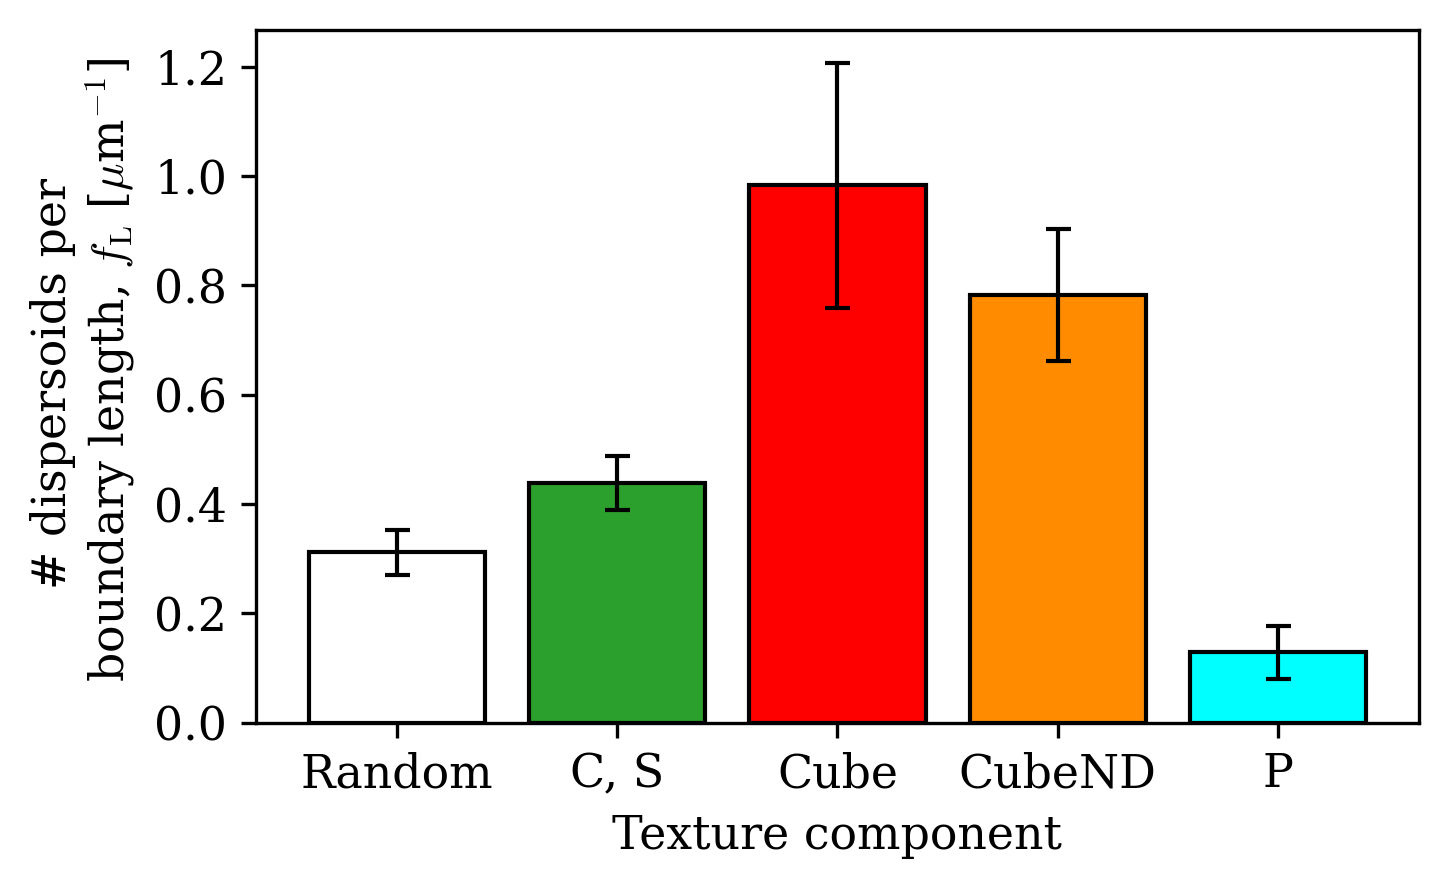

In [97]:
x = np.arange(5)
bar_kw["width"] = 0.8

fig, ax = plt.subplots(figsize=(5, 3))
for i, (name, label) in enumerate(zip(
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
)):
    c = comp_colors[label]
    ax.bar(
        x[i],
        comp_gb_rx_stats.loc["325c"][f"disp_per_length_mean_{name.lower()}"],
        yerr=comp_gb_rx_stats.loc["325c"][f"disp_per_length_confint_{name.lower()}"],
        capsize=3,
        color=c,
        **bar_kw
    )
ax.set_xticks(x)
ax.set_xticklabels(["Random", "C, S", "Cube", "CubeND", "P"])
ax.set_xlabel("Texture component")
ax.set_ylabel("# dispersoids per \n boundary length, $f_{\mathrm{L}}$ [$\mu$m$^{-1}$]");

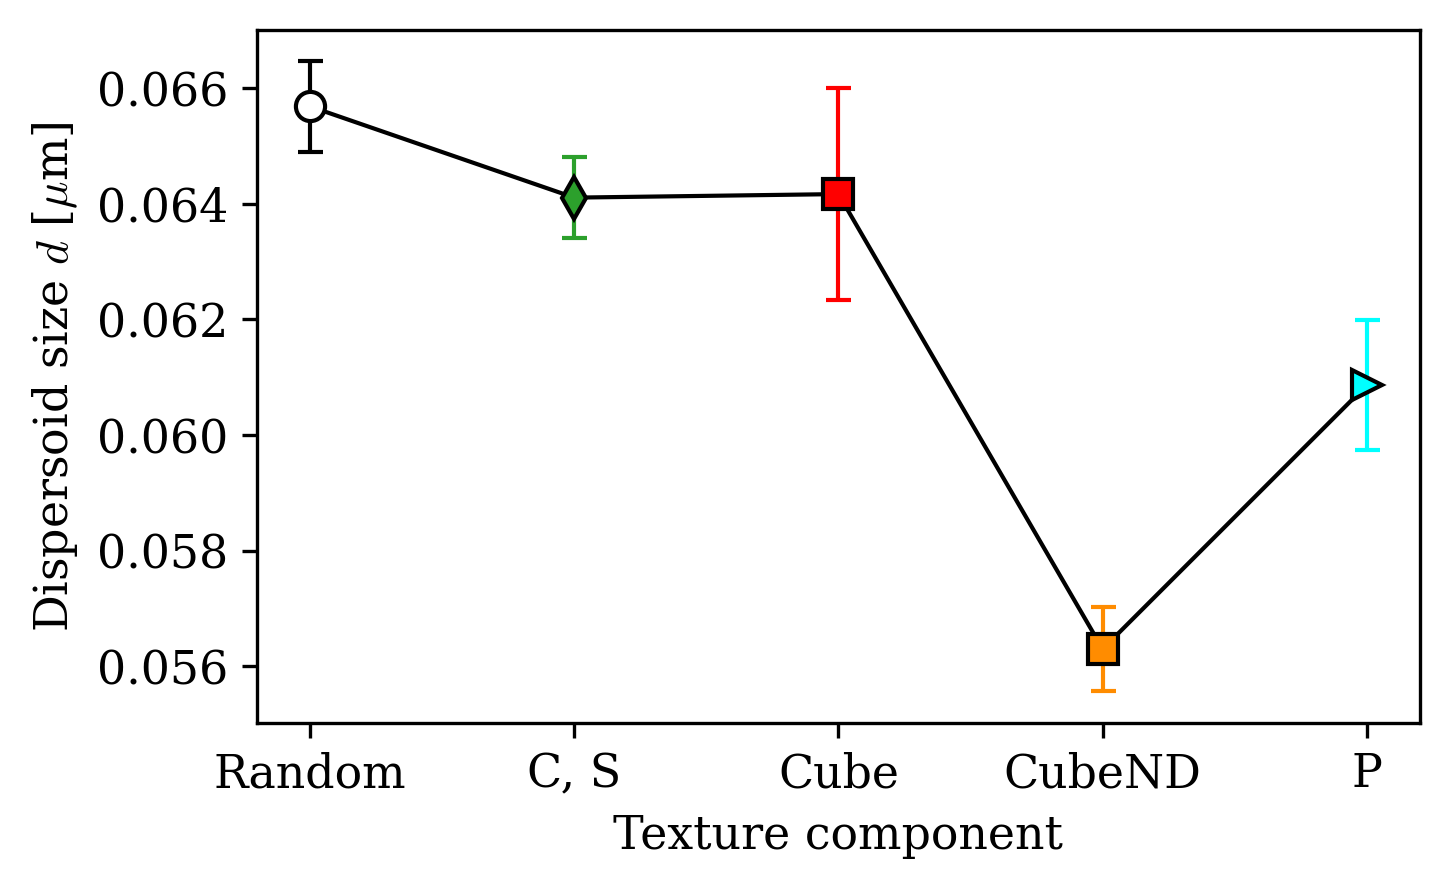

In [98]:
x = np.arange(5)
bar_kw["width"] = 0.8

fig, ax = plt.subplots(figsize=(5, 3))
for i, (name, label) in enumerate(zip(
    [comp_names[0], "def"] + comp_names[4:7],
    [comp_names[0], "C, S, B"] + comp_names[4:7],
)):
    if name == "Random":
        c = "k"
    else:
        c = comp_colors[label]
    ax.errorbar(
        x[i],
        comp_gb_rx_stats.loc["325c"][f"disp_size_mean_{name.lower()}"],
        yerr=comp_gb_rx_stats.loc["325c"][f"disp_size_confint_{name.lower()}"],
        capsize=3,
        label=label,
        color=c,
        markerfacecolor=comp_colors[label],
        marker=comp_markers[label],
        **marker_kw
    )
ax.plot(
    x,
    comp_gb_rx_stats.loc["325c"][[f"disp_size_mean_{n.lower()}" for n in [comp_names[0], "def"] + comp_names[4:7]]],
    "k-",
)
ax.set_xticks(x)
ax.set_xticklabels(["Random", "C, S", "Cube", "CubeND", "P"])
ax.set_xlabel("Texture component")
ax.set_ylabel(r"Dispersoid size $d$ [$\mu$m]");

## Relative misorientation angle distributions for all boundaries and boundaries w/dispersoids

In [99]:
n = 15
bins = np.linspace(0, 1.0961, n)
mori_angle_diff = np.zeros((4, n - 1))
for i, sample in enumerate(identifier):
    gbs_i = gbs[sample]

    n_dispersoids_close_i = gbs_i.n_dispersoids_close
    mask_i = n_dispersoids_close_i > 0
    angles_i = gbs_i.angle
    angles_disp_i = gbs_i.angle[mask_i]
    disp_per_length_i = n_dispersoids_close_i[mask_i]

    mori_angles_dens, _ = np.histogram(angles_i, bins, weights=gbs_i.length)
    mori_angles_dens /= np.sum(mori_angles_dens)
    mori_disp_angles_dens, _ = np.histogram(angles_disp_i, bins, weights=disp_per_length_i)
    mori_disp_angles_dens = mori_disp_angles_dens.astype(float) / np.sum(mori_disp_angles_dens)
    mori_angle_diff[i] = 100 * (mori_disp_angles_dens - mori_angles_dens)

Per condition

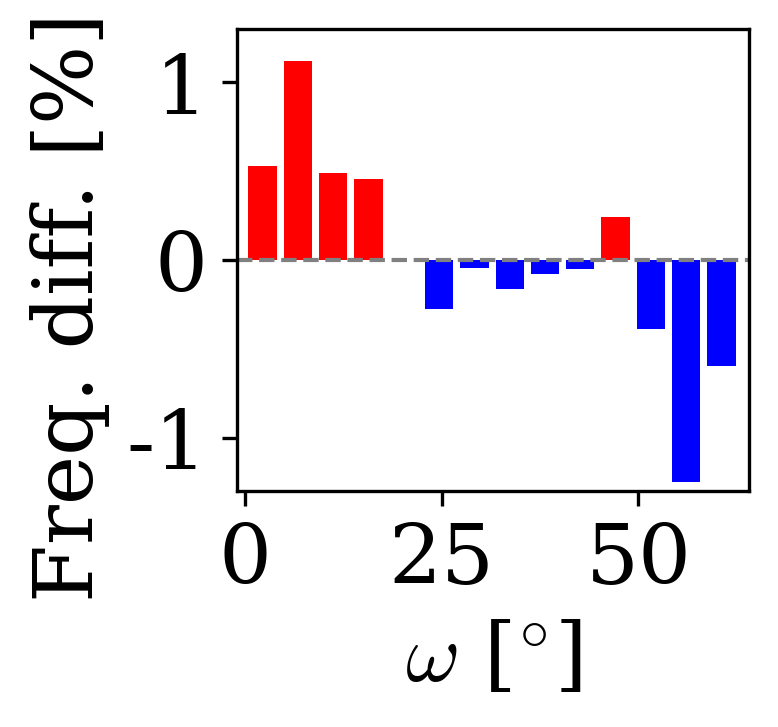

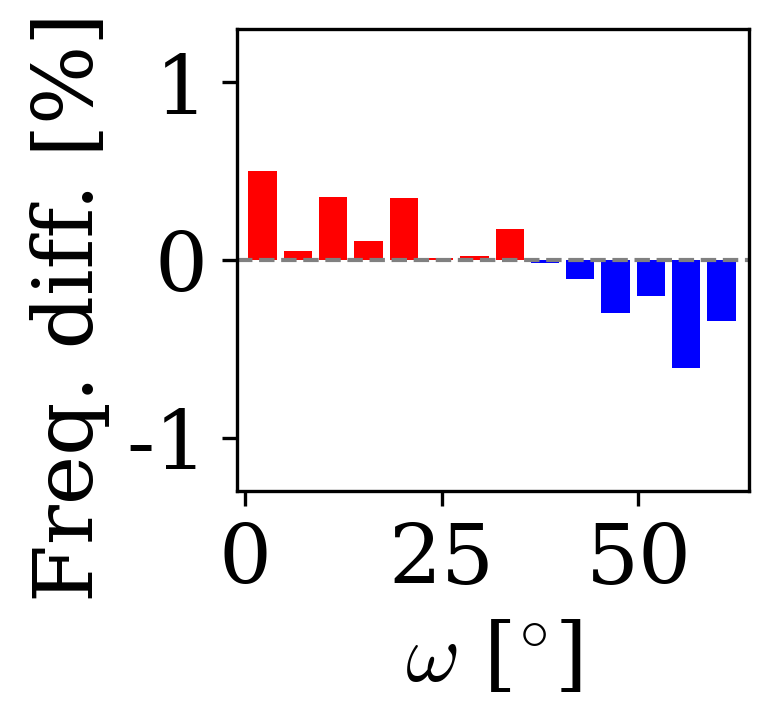

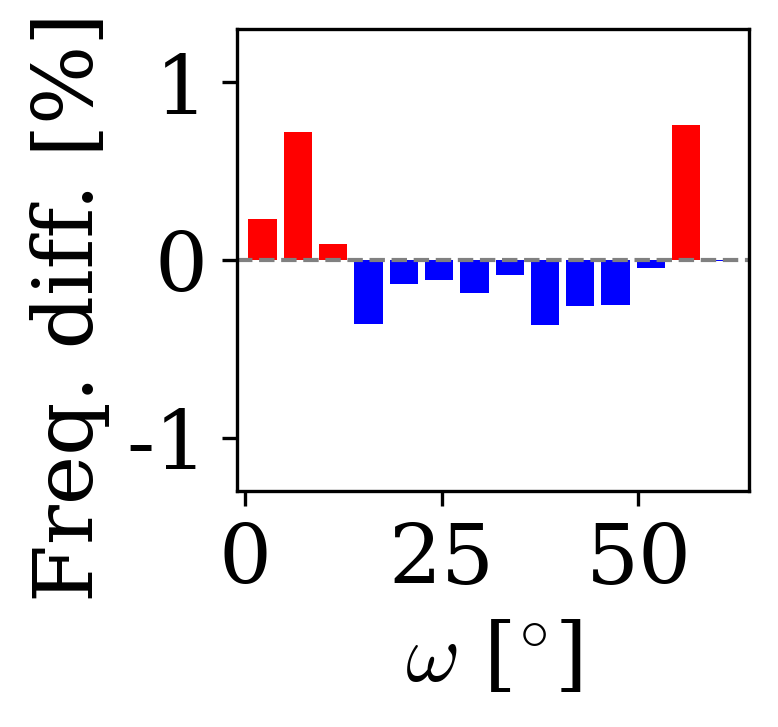

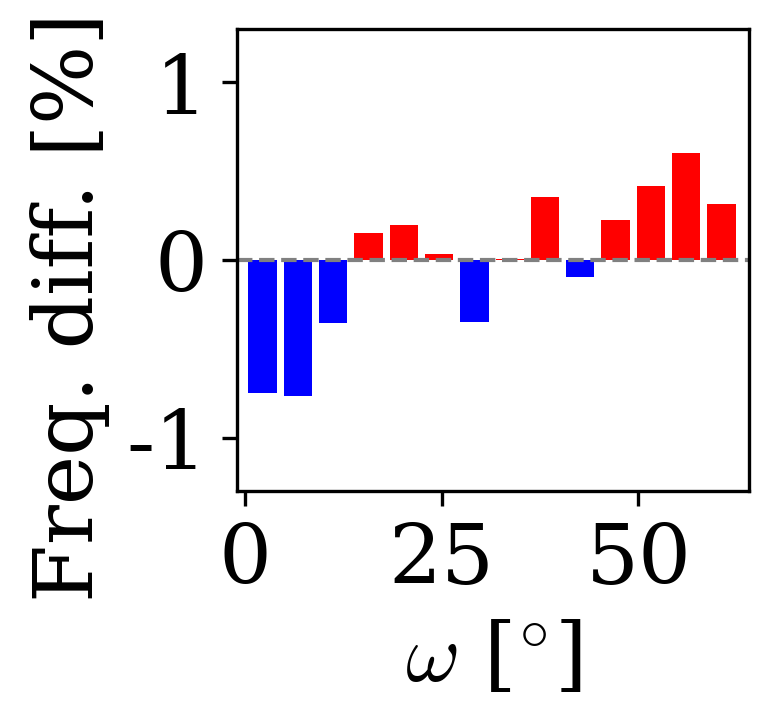

In [100]:
bin_mids = 0.5 * (bins[:-1] + bins[1:])
bin_mids_deg = np.rad2deg(bin_mids)
bar_width = 0.8 * np.rad2deg(bins[1])

for i in range(len(identifier)):
    mori_angle_diff_i = mori_angle_diff[i]
    mask_above = mori_angle_diff_i >= 0
    mask_below = mori_angle_diff_i < 0

    with plt.rc_context({"font.size": 20}):
        fig, ax = plt.subplots(figsize=(2.2, 2))
        ax.bar(bin_mids_deg[mask_above], mori_angle_diff_i[mask_above], width=bar_width, color="r")
        ax.bar(bin_mids_deg[mask_below], mori_angle_diff_i[mask_below], width=bar_width, color="b")
        ax.set_xlim(-1, 64)
        ax.set_ylim(-1.3, 1.3)
        ax.plot(ax.get_xlim(), [0, 0], "--", color="gray")
        y_ticks = [-1, 0, 1]
        ax.set_yticks(y_ticks)
        ax.set_yticklabels([str(t) for t in y_ticks])
        ax.set_ylabel("Freq. diff. [%]", y=0.4)
        ax.set_xlabel("$\omega$ [$^{\circ}$]")
    fig.savefig(
        os.path.join(dir_article, "mori_disp_diff", f"mori_angle_disp_diff_{identifier[i]}.png"),
        bbox_inches="tight",
        pad_inches=0.01,
        dpi=500,
        transparent=True,
    )

Relative misorientation angle distributions per angle at recrystallized grain boundaries

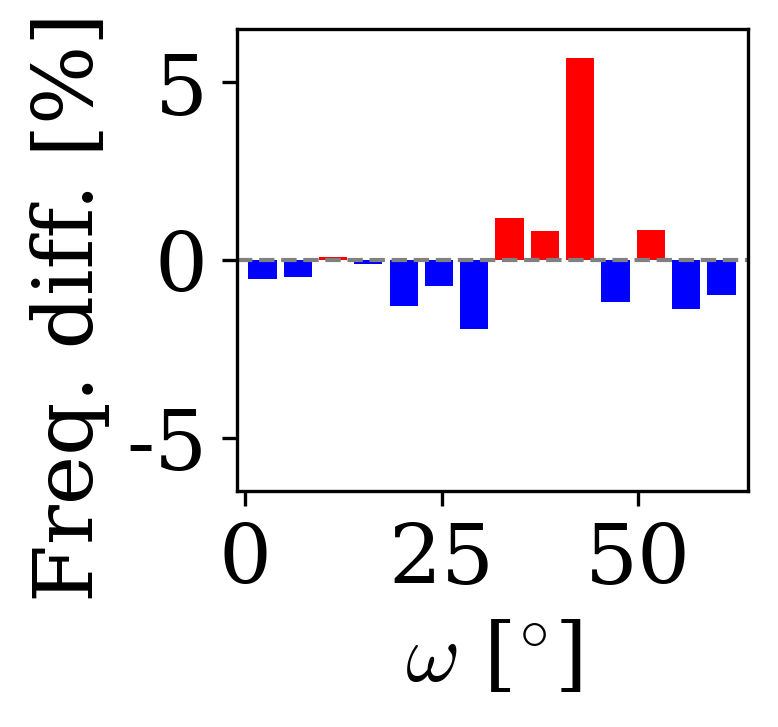

In [101]:
n = 15
bins = np.linspace(0, 1.0961, n)

gbs_i = gbs_rx["325c"]

n_dispersoids_close_i = gbs_i.n_dispersoids_close
mask_i = n_dispersoids_close_i > 0
angles_i = gbs_i.angle
angles_disp_i = gbs_i.angle[mask_i]
disp_per_length_i = n_dispersoids_close_i[mask_i]

mori_angles_dens, _ = np.histogram(angles_i, bins, weights=gbs_i.length)
mori_angles_dens /= np.sum(mori_angles_dens)
mori_disp_angles_dens, _ = np.histogram(angles_disp_i, bins, weights=disp_per_length_i)
mori_disp_angles_dens = mori_disp_angles_dens.astype(float) / np.sum(mori_disp_angles_dens)
mori_angle_diff = 100 * (mori_disp_angles_dens - mori_angles_dens)

# Plot
bin_mids = 0.5 * (bins[:-1] + bins[1:])
bin_mids_deg = np.rad2deg(bin_mids)
bar_width = 0.8 * np.rad2deg(bins[1])

mask_above = mori_angle_diff >= 0
mask_below = mori_angle_diff < 0

with plt.rc_context({"font.size": 20}):
    fig, ax = plt.subplots(figsize=(2.2, 2))
    ax.bar(bin_mids_deg[mask_above], mori_angle_diff[mask_above], width=bar_width, color="r")
    ax.bar(bin_mids_deg[mask_below], mori_angle_diff[mask_below], width=bar_width, color="b")
    ax.set_xlim(-1, 64)
    ax.set_ylim(-6.5, 6.5)
    ax.plot(ax.get_xlim(), [0, 0], "--", color="gray")
    y_ticks = [-5, 0, 5]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([str(t) for t in y_ticks])
    ax.set_ylabel("Freq. diff. [%]", y=0.4)
    ax.set_xlabel("$\omega$ [$^{\circ}$]")
fig.savefig(
    os.path.join(dir_article, "mori_disp_diff", "mori_angle_disp_diff_325c_rx.png"),
    bbox_inches="tight",
    pad_inches=0.01,
    dpi=500,
    transparent=True,
)